# 說明：adding rate的原始資料raw data會統一放在raw data資料夾內，一個資料夾即是一次模擬，資料夾結構如下：
## 資料夾名代表output_run_fmqa_initial number_adding number x iterations_第幾次模擬
### ------output_run_fmqa_initial number_adding number x iterations_第幾次模擬.ipynb
### ------paramter.json檔
### ------config.json檔存最佳結構
### ------訓練迭代.png


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
import pandas as pd
import seaborn as sns
from PIL import Image
import os
from matplotlib.patches import Rectangle
import textwrap
import matplotlib.cm as cm

# 策略一Adding Rate Results(VTIRF(Optical Filter) for example)
## 在這個章節中我們會展示
## 第1張圖：不同adding rate的收斂速度，
## 第2張圖：比較不同adding rate的效果並畫出boxplot
## encoding 60bits
## 26層結構52bits, 4種材料厚度選擇8 bits
## SiO2 厚度 5, 10, 15, 20 nm
## ag 厚度 5, 6, 7, 8 nm
## Hfo2 厚度 5, 10, 15, 20 nm
## Al2O3 厚度 5, 10, 15, 20 nm
## 方法：initial：1000筆，每次新增不同筆，執行不同 iterations，但維持最終筆數為4000筆
## =================================================================================================

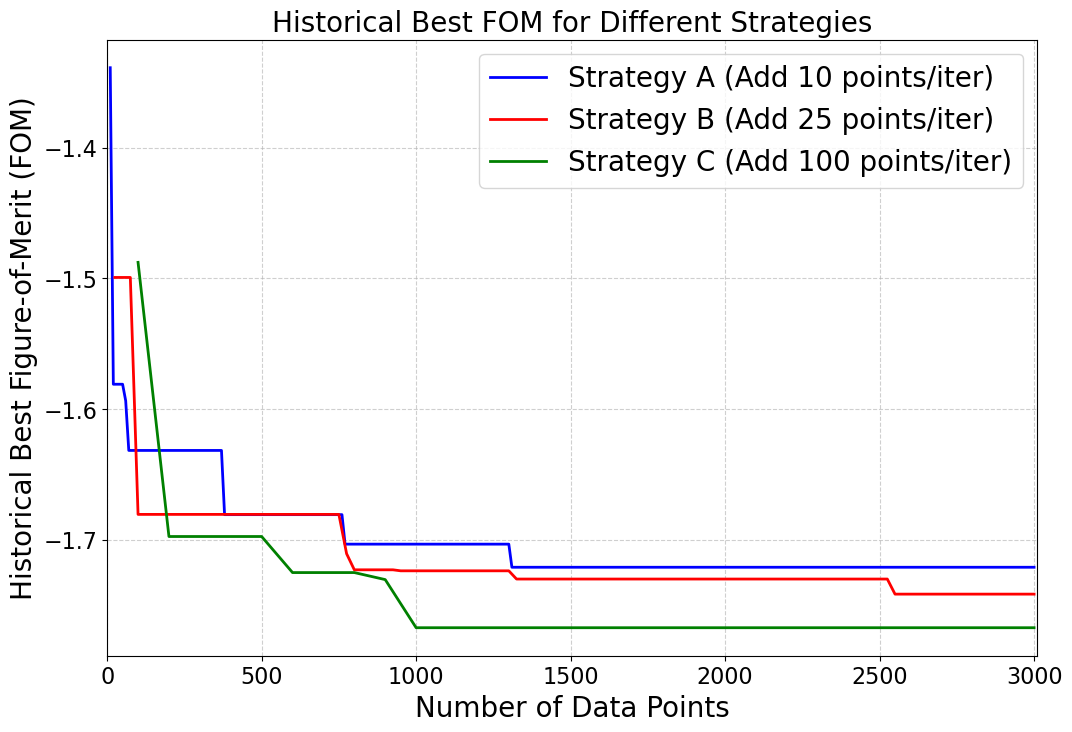

--- 各策略的最終結果 ---
策略 A (新增 10 筆/次)：最終歷史最佳 FOM = -1.7211
策略 B (新增 25 筆/次)：最終歷史最佳 FOM = -1.7416
策略 C (新增 100 筆/次)：最終歷史最佳 FOM = -1.7673


In [6]:

# 函數：從原始文字中提取 FOM 數值
def get_fom_values(raw_data):
    fom_values_str = re.findall(r'這個iter最小的foms_train: ([-+]?\d*\.\d+)', raw_data)
    return [float(fom) for fom in fom_values_str]

# 函數：計算歷史最佳 FOM
def get_historical_best(data):
    if not data:
        return []
    historical_best = [data[0]]
    for i in range(1, len(data)):
        if data[i] < historical_best[-1]:
            historical_best.append(data[i])
        else:
            historical_best.append(historical_best[-1])
    return historical_best

# --- 數據集1：基本設定 ---
file_name_1 = 'iteration_raw_data_1.txt'
try:
    with open(file_name_1, 'r', encoding='utf-8') as file:
        raw_data_1 = file.read()
    
except FileNotFoundError:
    print(f"錯誤: 找不到檔案 {file_name_1}")
except IOError:
    print(f"錯誤: 無法讀取檔案 {file_name_1}")


added_points_1 = 10
fom_values_1 = get_fom_values(raw_data_1)
historical_fom_1 = get_historical_best(fom_values_1)
data_points_1 = np.arange(added_points_1, (len(historical_fom_1) + 1) * added_points_1, added_points_1)

# --- 數據集2：每次新增 5 筆資料，總資料點數相同 ---
file_name_2 = 'iteration_raw_data_2.txt'
try:
    with open(file_name_2, 'r', encoding='utf-8') as file:
        raw_data_2 = file.read()
    
except FileNotFoundError:
    print(f"錯誤: 找不到檔案 {file_name_2}")
except IOError:
    print(f"錯誤: 無法讀取檔案 {file_name_2}")

added_points_2 = 25
fom_values_2 = get_fom_values(raw_data_2)
historical_fom_2 = get_historical_best(fom_values_2)
data_points_2 = np.arange(added_points_2, (len(historical_fom_2) + 1) * added_points_2, added_points_2)


# --- 數據集3：每次新增 20 筆資料，總資料點數相同 ---
# --- 步驟 2: 讀取檔案內容並存入 raw_data 變數 ---
file_name_3 = 'iteration_raw_data_3.txt'
try:
    with open(file_name_3, 'r', encoding='utf-8') as file:
        raw_data_3 = file.read()
    
except FileNotFoundError:
    print(f"錯誤: 找不到檔案 {file_name_3}")
except IOError:
    print(f"錯誤: 無法讀取檔案 {file_name_3}")

added_points_3 = 100
fom_values_3 = get_fom_values(raw_data_3)
historical_fom_3 = get_historical_best(fom_values_3)
data_points_3 = np.arange(added_points_3, (len(historical_fom_3) + 1) * added_points_3, added_points_3)

# 繪製圖表
plt.figure(figsize=(12, 8))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# 繪製三條歷史最佳 FOM 曲線
plt.plot(data_points_1, historical_fom_1, color='blue', linestyle='-', linewidth=2, label='Strategy A (Add 10 points/iter)')
plt.plot(data_points_2, historical_fom_2, color='red', linestyle='-', linewidth=2, label='Strategy B (Add 25 points/iter)')
plt.plot(data_points_3, historical_fom_3, color='green', linestyle='-', linewidth=2, label='Strategy C (Add 100 points/iter)')

# 設定圖表標題與軸標籤
plt.title('Historical Best FOM for Different Strategies', fontsize=20)
plt.xlabel('Number of Data Points', fontsize=20)
plt.ylabel('Historical Best Figure-of-Merit (FOM)', fontsize=20)

# 顯示圖例
plt.legend(fontsize=20)

# 增加格線
plt.grid(True, linestyle='--', alpha=0.6)

# 確保所有線條都在相同的 x 軸範圍內顯示
max_data_points = max(data_points_1.max(), data_points_2.max(), data_points_3.max())
plt.xlim(0, max_data_points + added_points_1) # 增加一些邊界，讓圖更美觀

# 顯示圖表
plt.show()

print("--- 各策略的最終結果 ---")
print(f"策略 A (新增 {added_points_1} 筆/次)：最終歷史最佳 FOM = {historical_fom_1[-1]:.4f}")
print(f"策略 B (新增 {added_points_2} 筆/次)：最終歷史最佳 FOM = {historical_fom_2[-1]:.4f}")
print(f"策略 C (新增 {added_points_3} 筆/次)：最終歷史最佳 FOM = {historical_fom_3[-1]:.4f}")

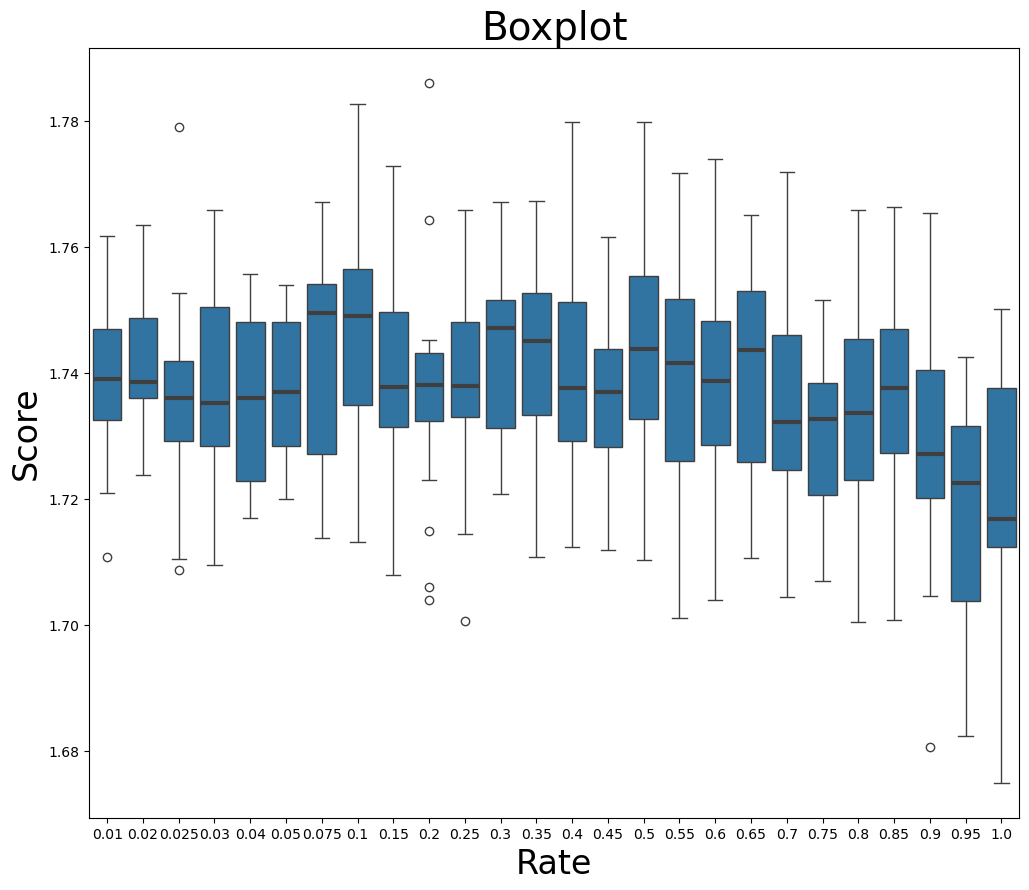

In [6]:
# 範例資料
data = {
    'rate': [1000/1000,1000/1000,1000/1000,1000/1000,1000/1000,1000/1000,1000/1000,1000/1000,1000/1000,1000/1000,
              1000/1000,1000/1000,1000/1000,1000/1000,1000/1000,1000/1000,1000/1000,1000/1000,1000/1000,1000/1000,
              950/1000,950/1000,950/1000,950/1000,950/1000,950/1000,950/1000,950/1000,950/1000,950/1000,
              950/1000,950/1000,950/1000,950/1000,950/1000,950/1000,950/1000,950/1000,950/1000,950/1000,
              900/1000,900/1000,900/1000,900/1000,900/1000,900/1000,900/1000,900/1000,900/1000,900/1000,
              900/1000,900/1000,900/1000,900/1000,900/1000,900/1000,900/1000,900/1000,900/1000,900/1000,
              850/1000,850/1000,850/1000,850/1000,850/1000,850/1000,850/1000,850/1000,850/1000,850/1000,
              850/1000,850/1000,850/1000,850/1000,850/1000,850/1000,850/1000,850/1000,850/1000,850/1000,
              800/1000,800/1000,800/1000,800/1000,800/1000,800/1000,800/1000,800/1000,800/1000,800/1000,
              800/1000,800/1000,800/1000,800/1000,800/1000,800/1000,800/1000,800/1000,800/1000,800/1000,
             750/1000,750/1000,750/1000,750/1000,750/1000,750/1000,750/1000,750/1000,750/1000,750/1000,
             750/1000,750/1000,750/1000,750/1000,750/1000,750/1000,750/1000,750/1000,750/1000,750/1000,
              700/1000,700/1000,700/1000,700/1000,700/1000,700/1000,700/1000,700/1000,700/1000,700/1000,
              700/1000,700/1000,700/1000,700/1000,700/1000,700/1000,700/1000,700/1000,700/1000,700/1000,
              650/1000,650/1000,650/1000,650/1000,650/1000,650/1000,650/1000,650/1000,650/1000,650/1000,
              650/1000,650/1000,650/1000,650/1000,650/1000,650/1000,650/1000,650/1000,650/1000,650/1000,
              600/1000,600/1000,600/1000,600/1000,600/1000,600/1000,600/1000,600/1000,600/1000,600/1000,
              600/1000,600/1000,600/1000,600/1000,600/1000,600/1000,600/1000,600/1000,600/1000,600/1000,
              550/1000,550/1000,550/1000,550/1000,550/1000,550/1000,550/1000,550/1000,550/1000,550/1000,
              550/1000,550/1000,550/1000,550/1000,550/1000,550/1000,550/1000,550/1000,550/1000,550/1000,
             500/1000,500/1000,500/1000,500/1000,500/1000,500/1000,500/1000,500/1000,500/1000,500/1000,
             500/1000,500/1000,500/1000,500/1000,500/1000,500/1000,500/1000,500/1000,500/1000,500/1000,
             450/1000,450/1000,450/1000,450/1000,450/1000,450/1000,450/1000,450/1000,450/1000,450/1000,
              450/1000,450/1000,450/1000,450/1000,450/1000,450/1000,450/1000,450/1000,450/1000,450/1000,
              400/1000,400/1000,400/1000,400/1000,400/1000,400/1000,400/1000,400/1000,400/1000,400/1000,
              400/1000,400/1000,400/1000,400/1000,400/1000,400/1000,400/1000,400/1000,400/1000,400/1000,
              350/1000,350/1000,350/1000,350/1000,350/1000,350/1000,350/1000,350/1000,350/1000,350/1000,
              350/1000,350/1000,350/1000,350/1000,350/1000,350/1000,350/1000,350/1000,350/1000,350/1000,
              300/1000,300/1000,300/1000,300/1000,300/1000,300/1000,300/1000,300/1000,300/1000,300/1000,
              300/1000,300/1000,300/1000,300/1000,300/1000,300/1000,300/1000,300/1000,300/1000,300/1000,
             250/1000,250/1000,250/1000,250/1000,250/1000,250/1000,250/1000,250/1000,250/1000,250/1000,
             250/1000,250/1000,250/1000,250/1000,250/1000,250/1000,250/1000,250/1000,250/1000,250/1000,
             200/1000,200/1000,200/1000,200/1000,200/1000,200/1000,200/1000,200/1000,200/1000,200/1000,
             200/1000,200/1000,200/1000,200/1000,200/1000,200/1000,200/1000,200/1000,200/1000,200/1000,
             150/1000,150/1000,150/1000,150/1000,150/1000,150/1000,150/1000,150/1000,150/1000,150/1000,
             150/1000,150/1000,150/1000,150/1000,150/1000,150/1000,150/1000,150/1000,150/1000,150/1000,
             100/1000,100/1000,100/1000,100/1000,100/1000,100/1000,100/1000,100/1000,100/1000,100/1000,
             100/1000,100/1000,100/1000,100/1000,100/1000,100/1000,100/1000,100/1000,100/1000,100/1000,
             75/1000,75/1000,75/1000,75/1000,75/1000,75/1000,75/1000,75/1000,75/1000,75/1000,
             75/1000,75/1000,75/1000,75/1000,75/1000,75/1000,75/1000,75/1000,75/1000,75/1000,
             50/1000,50/1000,50/1000,50/1000,50/1000,50/1000,50/1000,50/1000,50/1000,50/1000,
             50/1000,50/1000,50/1000,50/1000,50/1000,50/1000,50/1000,50/1000,50/1000,50/1000,
             40/1000,40/1000,40/1000,40/1000,40/1000,40/1000,40/1000,40/1000,40/1000,40/1000,
             40/1000,40/1000,40/1000,40/1000,40/1000,40/1000,40/1000,40/1000,40/1000,40/1000,
             30/1000,30/1000,30/1000,30/1000,30/1000,30/1000,30/1000,30/1000,30/1000,30/1000,
             30/1000,30/1000,30/1000,30/1000,30/1000,30/1000,30/1000,30/1000,30/1000,30/1000,
             25/1000,25/1000,25/1000,25/1000,25/1000,25/1000,25/1000,25/1000,25/1000,25/1000,
             25/1000,25/1000,25/1000,25/1000,25/1000,25/1000,25/1000,25/1000,25/1000,25/1000,
             20/1000,20/1000,20/1000,20/1000,20/1000,20/1000,20/1000,20/1000,20/1000,20/1000,
             20/1000,20/1000,20/1000,20/1000,20/1000,20/1000,20/1000,20/1000,20/1000,20/1000,
             10/1000,10/1000,10/1000,10/1000,10/1000,10/1000,10/1000,10/1000,10/1000,10/1000,
             10/1000,10/1000,10/1000,10/1000,10/1000,10/1000,10/1000,10/1000,10/1000,10/1000],
    'score': [1.7502,1.736,1.6929,1.73917,1.71275,1.704,1.722445,1.7112748,1.716712,1.706,
              1.7161,1.73656,1.746158,1.714058,1.7140476,1.737122,1.675,1.717053225,1.740097875,1.739110018,
              #950
              1.7313731909929133,1.729202924946392,1.726688801399472,1.7402036167150228,1.683167543401952,1.7021793996743741,1.7413375553924622,1.7057526036820374,1.7218922360697935,1.704585627746549,
              1.7394076511830328,1.7425595703807648,1.7043454677857908,1.7014047909415377,1.7204215264991443,1.7321336437743078,1.7231904150984367,1.6824761319101755,1.6832017439151268,1.7302648110895995,
              #900
              1.7395739164513406,1.680633290559556,1.75610514077754,1.7257861880634484,1.7433360675461869,1.7346760343711738,1.7654602853056787,1.7240020744417661,1.7349749405934487,1.7047118886341845,
              1.7199218527938698,1.7463896043846663,1.7335184422877532,1.7113385945537967,1.7203081029347134,1.7284492624102572,1.721358139585323,1.7184361787132945,1.7528104368097657,1.7226004313751855,              
              #850
              1.700830053820231,1.7391005952392755,1.7338897144165855,1.742107145388854,1.7256037618592786,1.7625763238690444,1.7625283903765763,1.7180173799831715,1.7439372915561437,1.7200020506082847,
              1.7280324191285406,1.7348522201673697,1.7501436040248042,1.7362805593185888,1.7172661619320557,1.7513647878361513,1.745947198905328,1.7664484712497703,1.739294307019933,1.7321924612054111,              
              #800
              1.7500013387237932,1.7338010871617047,1.7004837602563827,1.73354548933439,1.7455964288747625,1.728113584208854,1.7165605457980768,1.7401730039353223,1.740714785664013,1.7018085042800721,
              1.726119868128995,1.7491159361202908,1.7170538122368038,1.7250371153401491,1.76587245382074,1.711296318145449,1.7299698122785319,1.7628333866784318,1.7413962921844612,1.7454332712981067,           
              
              #750
              1.749587653,1.742031787,1.737319042,1.735633215,1.726358666,1.748925724,1.711138959,1.720114427,1.722473413,1.73609778,
              1.751685562,1.74431428,1.720867925,1.729642736,1.706971749,1.719439895,1.707206516,1.73693849,1.735071355,1.730367289,
              #700
              1.7175588560986723,1.7044297279503189,1.7410090724980791,1.7321258450645962,1.7188544192473685,1.761531699471156,1.7449274457235069,1.7249632261317245,1.75203206763707,1.7069011849166613,
              1.7251257477310136,1.7322570454636075,1.7239875158914229,1.7248376235760412,1.7718970463272663,1.732348182950374,1.7314511584718641,1.7496791053656466,1.744554690334611,1.7519175605219686,
              #650
              1.7242551957593026,1.751701976480401,1.7262793092756132,1.7107376092605602,1.732975321273254,1.7122469375207932,1.7445025044709568,1.7339386873334877,1.7487332735070757,1.7629591900762578,
              1.7214615680798124,1.7400166151647645,1.7429747484065226,1.7250149511573096,1.7651064228113849,1.757596551461664,1.7649145613066384,1.7448293317017523,1.7573009027327826,1.74760570922183,
              
              #600
              1.7118148939992117,1.7285471868586848,1.7304718532161079,1.7532166129124636,1.7405541459980756,1.728696347500864,1.7326357442028835,1.7087357475626386,1.7636625585169996,1.710402005229527,
              1.753344945139414,1.7440121501774033,1.7553578644524508,1.7467341310328683,1.7370561508001199,1.7423531231169611,1.7039518249909367,1.7451625276215317,1.7323298928979523,1.7740431192058295,              
              #550
              1.7010975974693996,1.7494622858095996,1.763101365690284,1.7265644992154123,1.7703345781961808,1.740014402878017,1.74774632615244,1.7588844289344288,1.763349566289984,1.724927487260047,
              1.725790000662427,1.7148532638926928,1.7469466635892028,1.7321953359372004,1.7718605176118059,1.7332284928726862,1.7255113155702084,1.7261297752700508,1.74636103243287,1.7432538293030906,
              #500
              1.7618,1.7473,1.7273,1.710383135,1.774081143,1.740216125,1.779893539,1.76680612,1.748584005,1.722779057,
              1.753757399,1.760514696,1.722215672,1.731210877,1.747177602,1.747228605,1.738765134,1.740414461,1.733272607,1.736723644,
              #450
              1.7224951523410081,1.744841265157124,1.7119005596459895,1.7435284795914543,1.7303392521819332,1.742542924378778,1.7511657025984912,1.7424244724819544,1.7369478680424872,1.7187278717089567,
              1.7402090145599354,1.732541173434017,1.7372333012379841,1.7358955355080934,1.7492276898278485,1.752296366070369,1.7355840893064511,1.7147121317431329,1.7615689211511742,1.7219417245089077,
              #400
              1.7301078989615633,1.7553168393663394,1.7651806119013695,1.7354250941172122,1.712364020100188,1.7499267235951013,1.729325856214859,1.739969403756435,1.7447778051422653,1.7589785015843182,
              1.729201845778247,1.7457259670377463,1.779912462931005,1.7342205502730363,1.7552949744469963,1.7339858823698637,1.7290030290048002,1.7204582419508816,1.740080580781268,1.7201381968889249,
              
              #350
              1.7107974609461116,1.7327665869501752,1.7562415861099707,1.7673011148004776,1.755731317590426,1.756070996313979,1.7189921225107638,1.745161618332366,1.7515328243096333,1.7324171924327292,
              1.7334862921558494,1.751391427982615,1.744450332006815,1.719144822910238,1.7377134755213617,1.7451930681295973,1.751580438844162,1.7429486225875392,1.758984043137225,1.75175828273552,

              #300
              1.7544654669083652,1.7320572382361517,1.7291438899610738,1.7475168274646595,1.7479183300708985,1.7269175356872568,1.7522093189048442,1.7467972813988197,1.7574580079013593,1.7671711879289076,
              1.7207754530481552,1.741830927731256,1.7385275958020872,1.728052528469867,1.7466089253626098,1.7513629341023602,1.722740728459885,1.749541876222752,1.7599091236221538,1.7496863719034597,
              #250
              1.765972328,1.73705134,1.733084695,1.747089695,1.73900822,1.734599903,1.746080826,1.700706455,1.738087126,1.751151298,
              1.714492775,1.753779229,1.753162817,1.729511243,1.733017805,1.72325298,1.734720563,1.741099137,1.737920209,1.7568582,
              #200
              1.7644,1.7363,1.723,1.745226871,1.714967345,1.786131937,1.703951719,1.706061194,1.74330683,1.741971462,
              1.735919733,1.743222031,1.740487119,1.728506951,1.733683045,1.738904067,1.74507146,1.740062668,1.737205498,1.737283154,
              #150
              1.749246489,1.750276637,1.712433596,1.772973065,1.765063865,1.734625218,1.741745243,1.735079695,1.731959218,1.726700715,
              1.768544054,1.749631006,1.729804273,1.744304721,1.729512242,1.767447244,1.707977296,1.738632509,1.736335515,1.737122117,

              #100
              1.7828,1.7514,1.7467,1.752925539,1.713247611,1.744744872,1.752803855,1.757801518,1.758506486,1.76733498,
              1.756050097,1.734390027,1.732479882,1.751345065,1.735168924,1.746917969,1.737663605,1.728927956,1.734024589,1.762896805,
              
              1.726169511,1.762095747,1.742726736,1.727540066,1.755863899,1.765550571,1.749520042,1.749689417,1.763485894,1.7221012,
              1.715861823,1.739397818,1.750470184,1.713871699,1.767192268,1.751075796,1.719789501,1.737949594,1.750379516,1.753600927,
              
              1.749,1.7337,1.7271,1.735124464,1.75403723,1.725091262,1.736863338,1.720041338,1.728853776,1.745362132,              
              1.748988925,1.742686715,1.747954274,1.737052809,1.725618197,1.741113158,1.736684786,1.726476346,1.749693603,1.750234592,
             
              1.726899371,1.747375853,1.718854872,1.744393966,1.742245577,1.731979179,1.755785709,1.717078248,1.75037051,1.734473313,
              1.754496118,1.722822466,1.72296478,1.75392362,1.752837932,1.722154655,1.744100503,1.726902787,1.737782995,1.717533663,
              
              1.7356,1.7276,1.7095,1.748613162,1.726952221,1.745159917,1.730089175,1.756823313,1.765959084,1.762789403,
              1.731764417,1.752643966,1.744245584,1.728724015,1.728657539,1.726402672,1.725419228,1.734834514,1.753841467,1.749850913,
              
              1.750622785,1.73220822,1.779168746,1.741078591,1.741624892,1.728941785,1.729381928,1.73576291,1.734182648,1.729345836,
              1.708715251,1.741772525,1.727697507,1.742201103,1.740032041,1.736377293,1.710546166,1.722299649,1.752690597,1.751354978,
              
              1.7476,1.7365,1.7293,1.763514685,1.731556114,1.752607986,1.738365775,1.7403945,1.750849789,1.737881902,
              1.723852988,1.745943264,1.761304007,1.738203372,1.755436183,1.730104457,1.748078552,1.735146539,1.73630574,1.738949098,
              
              1.71079318,1.754134824,1.733567729,1.742363214,1.744302738,1.721068788,1.725298572,1.738606368,1.761776305,1.739704841,
              1.729398183,1.733756607,1.749700195,1.73523608,1.755014183,1.746814417,1.747428284,1.734835175,1.727824715,1.74433879]
}
df = pd.DataFrame(data)

# 畫 boxplot
plt.figure(figsize=(12, 10))
ax= sns.boxplot(x='rate', y='score', data=df, legend='brief',  medianprops={'linewidth': 3} )
ax.set_xlabel("Rate", fontsize=24)
ax.set_ylabel("Score", fontsize=24)
plt.title('Boxplot',fontsize=28)
plt.savefig("boxplot.png")
plt.show()


# 策略二K factor and compared with one-shot("Photomask" for example) (FOM理想最小值為0) 
## 在這個部分會討論K factor的影響，以及與One-Shot的比較，顯示Initial dataset數量 與 後來新增的annealing出來的總數要平衡比較好，一開始高能量的initial data太多時，會讓最佳化太容易偏向廣度搜尋。 

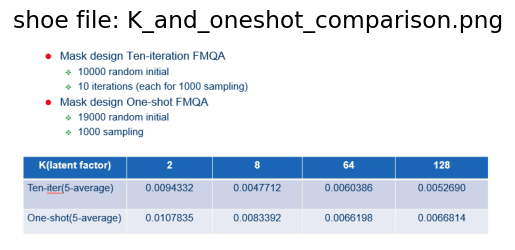

成功讀取並顯示 'K_and_oneshot_comparison.png'，影像尺寸為 (746, 307)。


In [8]:

def show_png_image(file_path):
    """
    讀取一個 PNG 檔案並顯示它。
    
    Args:
        file_path (str): PNG 檔案的路徑。
    """
    if not os.path.exists(file_path):
        print(f"錯誤：找不到檔案 '{file_path}'。請檢查檔案路徑是否正確。")
        return

    try:
        # 使用 Pillow 的 Image.open() 函式讀取影像
        img = Image.open(file_path)
        
        # 使用 Matplotlib 來顯示影像
        plt.imshow(img)
        plt.title(f"shoe file: {os.path.basename(file_path)}")
        plt.axis('off')  # 關閉座標軸，讓圖看起來更乾淨
        plt.show()

        print(f"成功讀取並顯示 '{file_path}'，影像尺寸為 {img.size}。")

    except Exception as e:
        print(f"處理檔案時發生錯誤：{e}")

# 請將 'your_image.png' 替換為你的 PNG 檔案名稱或完整路徑
show_png_image('K_and_oneshot_comparison.png')

# 策略三Energy-based choosing vs FOM-based choosing (VTIRF(Optical Filter)for example)
## 在FMQA方法中，新增進資料集的選取標準，可以有 Energy-based choosing 或是 FOM-based choosing
## encoding 60bits
## 26層結構52bits, 4種材料厚度選擇8 bits
## SiO2 厚度 5, 10, 15, 20 nm
## ag 厚度 5, 6, 7, 8 nm
## Hfo2 厚度 5, 10, 15, 20 nm
## Al2O3 厚度 5, 10, 15, 20 nm
## 方法：initial：10000筆，每次從1000筆選擇較好的，新增500筆，執行50 iterations
## =================================================================================================

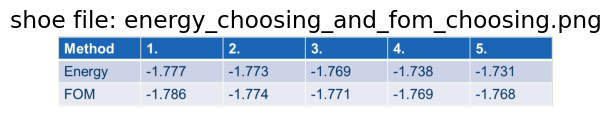

成功讀取並顯示 'energy_choosing_and_fom_choosing.png'，影像尺寸為 (1339, 203)。


In [9]:
def show_png_image(file_path):
    """
    讀取一個 PNG 檔案並顯示它。
    
    Args:
        file_path (str): PNG 檔案的路徑。
    """
    if not os.path.exists(file_path):
        print(f"錯誤：找不到檔案 '{file_path}'。請檢查檔案路徑是否正確。")
        return

    try:
        # 使用 Pillow 的 Image.open() 函式讀取影像
        img = Image.open(file_path)
        
        # 使用 Matplotlib 來顯示影像
        plt.imshow(img)
        plt.title(f"shoe file: {os.path.basename(file_path)}")
        plt.axis('off')  # 關閉座標軸，讓圖看起來更乾淨
        plt.show()

        print(f"成功讀取並顯示 '{file_path}'，影像尺寸為 {img.size}。")

    except Exception as e:
        print(f"處理檔案時發生錯誤：{e}")

# 請將 'your_image.png' 替換為你的 PNG 檔案名稱或完整路徑
show_png_image('energy_choosing_and_fom_choosing.png')

# 策略四Thickness Encoding (VTIRF(Optical Filter) for example) 
## 在這章中，1.我們會嘗試不同厚度的選擇的排列組合，發現銀的厚度非常關鍵，
## 因此，2.將此資訊編碼進量子位元(Qubits)中。

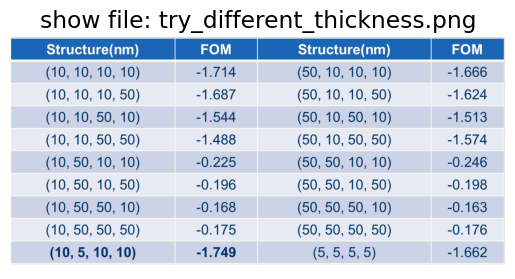

成功讀取並顯示 'try_different_thickness.png'，影像尺寸為 (1340, 629)。


In [10]:
def show_png_image(file_path):
    """
    讀取一個 PNG 檔案並顯示它。
    
    Args:
        file_path (str): PNG 檔案的路徑。
    """
    if not os.path.exists(file_path):
        print(f"錯誤：找不到檔案 '{file_path}'。請檢查檔案路徑是否正確。")
        return

    try:
        # 使用 Pillow 的 Image.open() 函式讀取影像
        img = Image.open(file_path)
        
        # 使用 Matplotlib 來顯示影像
        plt.imshow(img)
        plt.title(f"show file: {os.path.basename(file_path)}")
        plt.axis('off')  # 關閉座標軸，讓圖看起來更乾淨
        plt.show()

        print(f"成功讀取並顯示 '{file_path}'，影像尺寸為 {img.size}。")

    except Exception as e:
        print(f"處理檔案時發生錯誤：{e}")

# 請將 'your_image.png' 替換為你的 PNG 檔案名稱或完整路徑
show_png_image('try_different_thickness.png')

# 策略四將厚度資訊編碼進量子位元(Qubits)中，發現得到與重複多次試的排列組合是同一組，都是銀厚度5奈米，其他材料10奈米。
## encoding 60bits
## 26層結構52bits, 4種材料厚度選擇8 bits
## SiO2 厚度 5, 10, 25, 50 nm
## ag 厚度 5, 10, 25, 50 nm
## Hfo2 厚度 5, 10, 25, 50 nm
## Al2O3 厚度 5, 10, 25, 50 nm
## 方法：initial：1000筆，每次新增100筆，執行30 iterations
## =================================================================================================

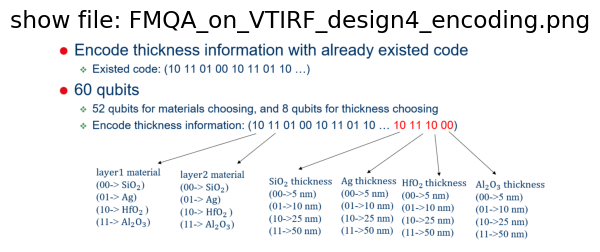

成功讀取並顯示 'FMQA_on_VTIRF_design4_encoding.png'，影像尺寸為 (1265, 526)。


In [11]:
def show_png_image(file_path):
    """
    讀取一個 PNG 檔案並顯示它。
    
    Args:
        file_path (str): PNG 檔案的路徑。
    """
    if not os.path.exists(file_path):
        print(f"錯誤：找不到檔案 '{file_path}'。請檢查檔案路徑是否正確。")
        return

    try:
        # 使用 Pillow 的 Image.open() 函式讀取影像
        img = Image.open(file_path)
        
        # 使用 Matplotlib 來顯示影像
        plt.imshow(img)
        plt.title(f"show file: {os.path.basename(file_path)}")
        plt.axis('off')  # 關閉座標軸，讓圖看起來更乾淨
        plt.show()

        print(f"成功讀取並顯示 '{file_path}'，影像尺寸為 {img.size}。")

    except Exception as e:
        print(f"處理檔案時發生錯誤：{e}")

# 請將 'your_image.png' 替換為你的 PNG 檔案名稱或完整路徑
show_png_image('FMQA_on_VTIRF_design4_encoding.png')


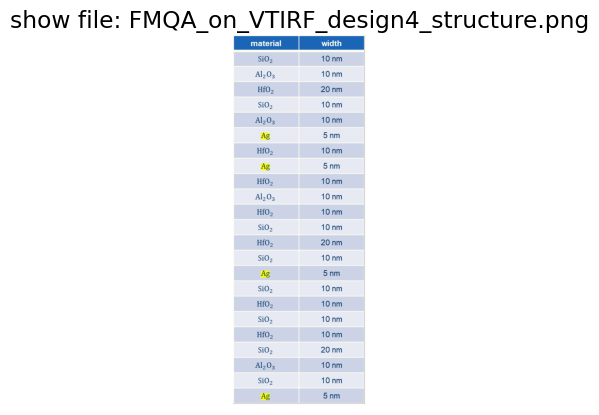

成功讀取並顯示 'FMQA_on_VTIRF_design4_structure.png'，影像尺寸為 (347, 966)。


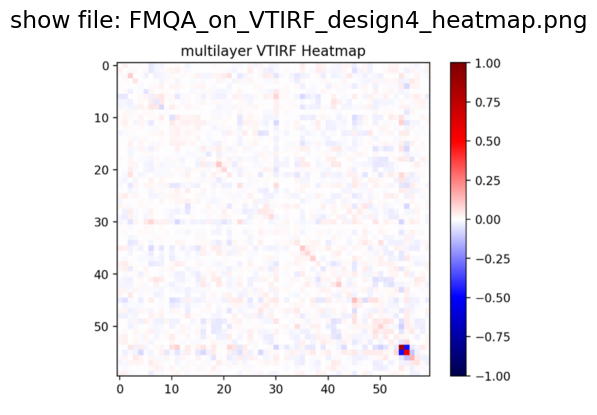

成功讀取並顯示 'FMQA_on_VTIRF_design4_heatmap.png'，影像尺寸為 (831, 683)。


In [12]:
show_png_image('FMQA_on_VTIRF_design4_structure.png')
show_png_image('FMQA_on_VTIRF_design4_heatmap.png')

# Best Structure and Spectrum and magnetic intensity
## FOM:-1.786
### FOM choosing
## encoding 60bits
## 26層結構52bits, 4種材料厚度選擇8 bits
## SiO2 厚度 5, 10, 15, 20 nm
## ag 厚度 5, 10, 25, 50 nm
## Hfo2 厚度 5, 6, 7, 8 nm
## Al2O3 厚度 5, 10, 15, 20 nm
## 方法：initial：10000筆，每次從1000筆裡面挑選較好的FOM，新增500筆，執行50 iterations
## =================================================================================================

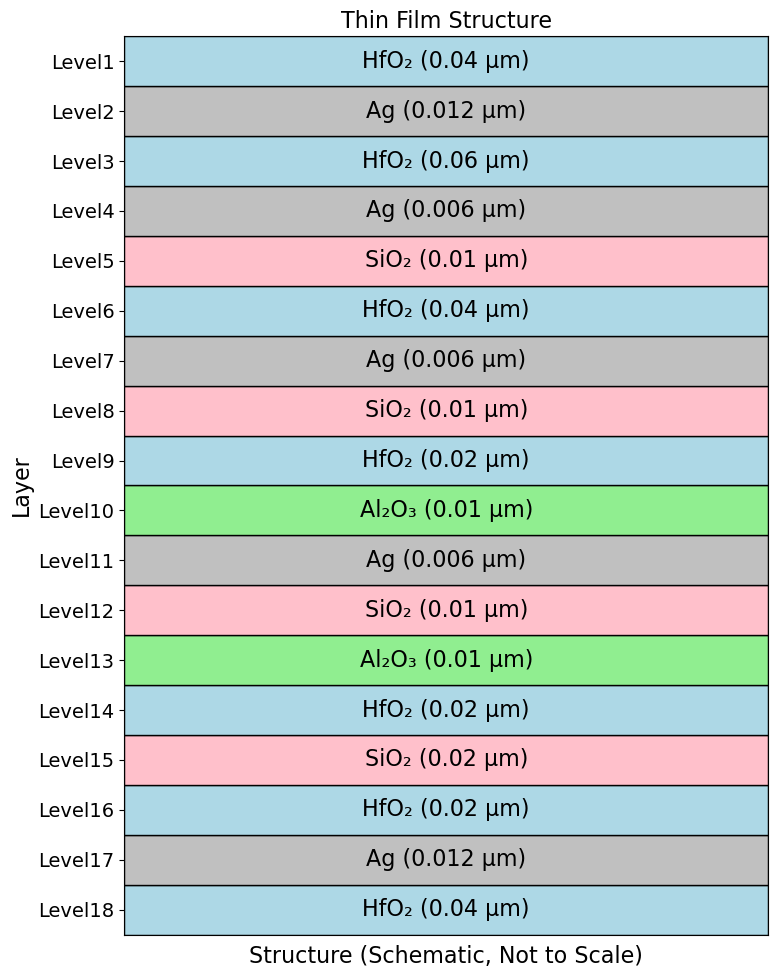

In [13]:

# Data for the film layers
layers_data = [
    {'name': 'Level1', 'thickness': 0.04, 'material': 'HfO2'},
    {'name': 'Level2', 'thickness': 0.012, 'material': 'Ag'},
    {'name': 'Level3', 'thickness': 0.06, 'material': 'HfO2'},
    {'name': 'Level4', 'thickness': 0.006, 'material': 'Ag'},
    {'name': 'Level5', 'thickness': 0.01, 'material': 'SiO2'},
    {'name': 'Level6', 'thickness': 0.04, 'material': 'HfO2'},
    {'name': 'Level7', 'thickness': 0.006, 'material': 'Ag'},
    {'name': 'Level8', 'thickness': 0.01, 'material': 'SiO2'},
    {'name': 'Level9', 'thickness': 0.02, 'material': 'HfO2'},
    {'name': 'Level10', 'thickness': 0.01, 'material': 'Al2O3'},
    {'name': 'Level11', 'thickness': 0.006, 'material': 'Ag'},
    {'name': 'Level12', 'thickness': 0.01, 'material': 'SiO2'},
    {'name': 'Level13', 'thickness': 0.01, 'material': 'Al2O3'},
    {'name': 'Level14', 'thickness': 0.02, 'material': 'HfO2'},
    {'name': 'Level15', 'thickness': 0.02, 'material': 'SiO2'},
    {'name': 'Level16', 'thickness': 0.02, 'material': 'HfO2'},
    {'name': 'Level17', 'thickness': 0.012, 'material': 'Ag'},
    {'name': 'Level18', 'thickness': 0.04, 'material': 'HfO2'}
]

# Colors for each material
material_colors = {
    'HfO2': '#ADD8E6',
    'Ag': '#C0C0C0',
    'SiO2': '#FFC0CB',
    'Al2O3': '#90EE90'
}

# Mapping materials to their Unicode subscript format
material_unicode_map = {
    'HfO2': 'HfO₂',
    'Ag': 'Ag',
    'SiO2': 'SiO₂',
    'Al2O3': 'Al₂O₃'
}

def plot_thin_film_structure(layers):
    """
    Plots the thin film structure using standard Unicode subscripts, with layers sorted from bottom to top.
    """
    fig, ax = plt.subplots(figsize=(8, 10))
    layer_height = 1
    current_y = 0
    
    # 這裡將 layers_data 列表反轉，從而實現由下至上繪圖
    reversed_layers = layers[::-1]
    
    for i, layer in enumerate(reversed_layers):
        material_plain = layer['material']
        thickness = layer['thickness']
        
        rect_color = material_colors.get(material_plain, 'white')
        
        ax.add_patch(Rectangle((0, current_y), 1, layer_height, facecolor=rect_color, edgecolor='black'))
        
        material_with_subscript = material_unicode_map.get(material_plain, material_plain)
        
        label_text = f"{material_with_subscript}\n({thickness} µm)"
        wrapped_label = textwrap.fill(label_text, width=15)
        
        ax.text(0.5, current_y + layer_height / 2, wrapped_label, ha='center', va='center', fontsize=16)
        
        current_y += layer_height
        
    ax.set_title('Thin Film Structure', fontsize=16)
    ax.set_xlabel('Structure (Schematic, Not to Scale)', fontsize=16)
    ax.set_ylabel('Layer', fontsize=16)
    
    ax.set_xticks([])
    
    # 將 y 軸標籤的順序也反轉，使其與由下至上的圖層順序一致
    y_ticks = [i * layer_height + layer_height/2 for i in range(len(layers))]
    y_labels = [f"Level{i+1}" for i in range(len(layers))]
    reversed_y_labels = y_labels[::-1]
    ax.set_yticks(y_ticks, labels=reversed_y_labels)
    
    ax.set_ylim(0, current_y)
    
    plt.tight_layout()
    plt.show()

# Run the plotting function
plot_thin_film_structure(layers_data)

# Best structure with real size ratio 

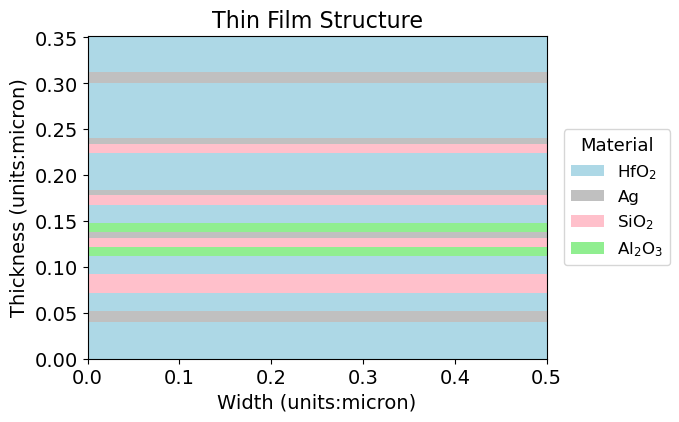

In [14]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# --- Data Definition ---
layers_data = [
    {'name': 'Level1', 'thickness': 0.04, 'material': 'HfO2'},
    {'name': 'Level2', 'thickness': 0.012, 'material': 'Ag'},
    {'name': 'Level3', 'thickness': 0.06, 'material': 'HfO2'},
    {'name': 'Level4', 'thickness': 0.006, 'material': 'Ag'},
    {'name': 'Level5', 'thickness': 0.01, 'material': 'SiO2'},
    {'name': 'Level6', 'thickness': 0.04, 'material': 'HfO2'},
    {'name': 'Level7', 'thickness': 0.006, 'material': 'Ag'},
    {'name': 'Level8', 'thickness': 0.01, 'material': 'SiO2'},
    {'name': 'Level9', 'thickness': 0.02, 'material': 'HfO2'},
    {'name': 'Level10', 'thickness': 0.01, 'material': 'Al2O3'},
    {'name': 'Level11', 'thickness': 0.006, 'material': 'Ag'},
    {'name': 'Level12', 'thickness': 0.01, 'material': 'SiO2'},
    {'name': 'Level13', 'thickness': 0.01, 'material': 'Al2O3'},
    {'name': 'Level14', 'thickness': 0.02, 'material': 'HfO2'},
    {'name': 'Level15', 'thickness': 0.02, 'material': 'SiO2'},
    {'name': 'Level16', 'thickness': 0.02, 'material': 'HfO2'},
    {'name': 'Level17', 'thickness': 0.012, 'material': 'Ag'},
    {'name': 'Level18', 'thickness': 0.04, 'material': 'HfO2'}
]

# Color settings for each material
material_colors = {
    'HfO2': '#ADD8E6',  # Light Blue
    'Ag': '#C0C0C0',    # Silver Gray
    'SiO2': '#FFC0CB',  # Pink
    'Al2O3': '#90EE90'  # Light Green
}

# Mapping materials to their Matplotlib TeX subscript format
material_tex_map = {
    'HfO2': r'HfO$_2$',   # Using Matplotlib's TeX syntax for subscripts
    'Ag': 'Ag',
    'SiO2': r'SiO$_2$',
    'Al2O3': r'Al$_2$O$_3$'
}

# --- Dimension Settings ---
STRUCTURE_WIDTH = 0.5  # Actual structure width
TOTAL_THICKNESS = sum(layer['thickness'] for layer in layers_data) # Total height (0.176)

# Desired aspect ratio for the plot area (width:height)
DESIRED_ASPECT_RATIO = 500 / 352

def plot_thin_film_structure_minimal_inverted(layers, width, total_thickness, colors, tex_map, aspect_ratio):
    """
    Plots the thin film structure in reverse order (Level 1 at bottom, Level 18 at top).
    """
    
    # --- Figure Size Calculation (for 500:352 Aspect Ratio) ---
    base_fig_width = 7 
    fig_height = base_fig_width / aspect_ratio 
    fig, ax = plt.subplots(figsize=(base_fig_width, fig_height))
    
    # *** 關鍵修改 1: current_y 從最高處開始 (Top) ***
    # 讓 Level 1 的起點在 total_thickness，然後往下畫
    current_y = total_thickness  
    
    # *** 關鍵修改 2: 維持原始順序，但向下堆疊 ***
    for layer in layers: 
        thickness = layer['thickness']
        material_plain = layer['material']
        
        rect_color = colors.get(material_plain, 'white')
        
        # 計算新的起始點 (Rectangle 的左下角 Y 座標)
        # 因為是從上往下畫，新的 y 座標是 (舊的 y - thickness)
        new_y = current_y - thickness 
        
        # Draw the rectangle without edge lines
        # 左下角座標是 (0, new_y)
        ax.add_patch(Rectangle((0, new_y), width, thickness, 
                              facecolor=rect_color, 
                              edgecolor='none', 
                              linewidth=0))      
        
        # 更新 current_y 為下一層的起點 (即這一層的底部)
        current_y = new_y
        
    # --- Axis and Title Configuration ---
    # 不需要反轉 Y 軸，讓 Y 軸從 0 (Bottom) 到 total_thickness (Top) 維持正常
    ax.set_ylim(0, total_thickness) 
    
    ax.set_title('Thin Film Structure', fontsize=16)
    ax.set_xlabel(f'Width (units:micron)', fontsize=14)
    ax.set_ylabel(f'Thickness (units:micron)', fontsize=14)
    
    ax.set_xlim(0, width)
    ax.set_aspect('equal', adjustable='box') 
    
    # --- Material Legend (維持不變) ---
    legend_patches = []
    material_order = ['HfO2', 'Ag', 'SiO2', 'Al2O3']

    for mat_plain in material_order:
        color = colors.get(mat_plain)
        patch = Rectangle((0, 0), 1, 1, facecolor=color, edgecolor='none', linewidth=0)
        legend_patches.append(patch)

    legend_labels = [tex_map.get(m) for m in material_order]

    ax.legend(legend_patches, legend_labels, 
              title="Material", loc='center left', bbox_to_anchor=(1.02, 0.5), 
              fontsize=12, title_fontsize='13')
    
    plt.tight_layout()
    plt.show()

# --- Run the Plotting Function ---
plot_thin_film_structure_minimal_inverted(
    layers_data, 
    STRUCTURE_WIDTH, 
    TOTAL_THICKNESS, 
    material_colors, 
    material_tex_map,
    DESIRED_ASPECT_RATIO
)

已成功從兩個檔案中讀取資料。


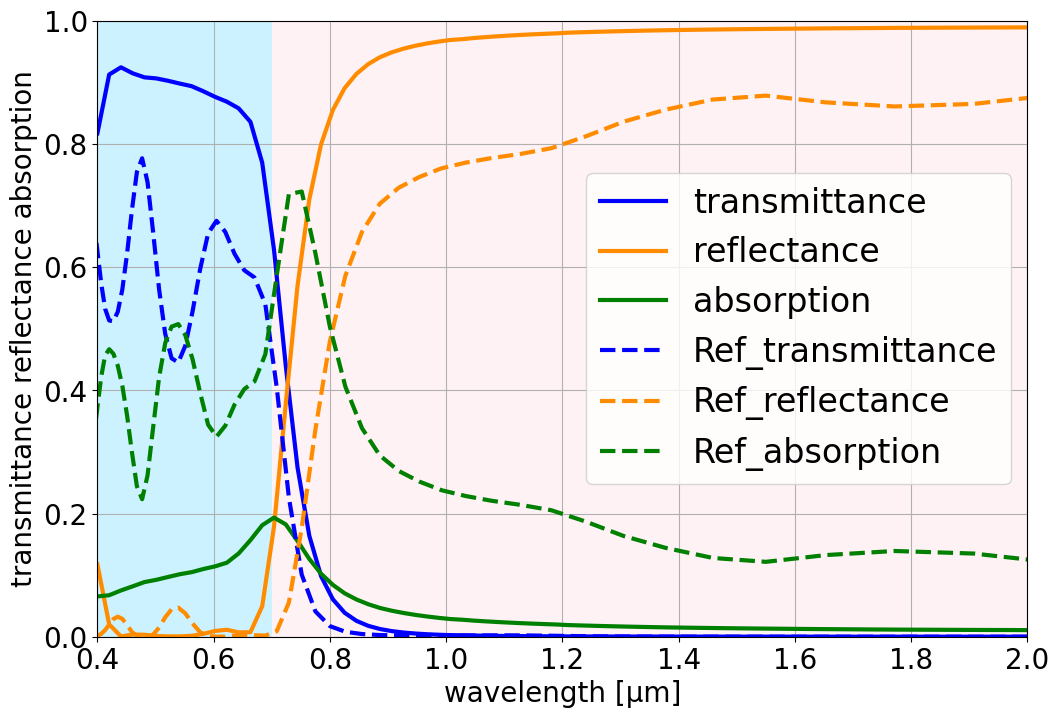

In [21]:

def plot_from_files():
    """從兩個檔案中讀取資料，並重現圖表。"""
    try:
        # 讀取 SA 資料
        sa_data = np.loadtxt('SA_plot_data.txt', skiprows=1)
        wll = sa_data[:, 0]
        Tcl_back = sa_data[:, 1]
        Rcl_back = sa_data[:, 2]
        Acl_back = sa_data[:, 3]

        # 讀取 FDTD 資料
        fdtd_data = np.loadtxt('Our_plot_data.txt', skiprows=1)
        wavelength_array = fdtd_data[:, 0]
        efficiency_array = fdtd_data[:, 1]
        reflected_flux_array = fdtd_data[:, 2]
        emissive_array = fdtd_data[:, 3]

        print("已成功從兩個檔案中讀取資料。")

    except FileNotFoundError as e:
        print(f"錯誤：找不到檔案，請確認檔案已存在。{e}")
        return
    except Exception as e:
        print(f"讀取檔案時發生錯誤：{e}")
        return

    # 重現圖表
    plt.figure(figsize=(12, 8))
    plt.grid(True)
    plt.rcParams['font.size'] = 24
    plt.xlabel('wavelength [μm]')
    plt.ylabel('transmittance reflectance absorption')
    
    # 繪製 FDTD 線條
    plt.plot(wavelength_array, efficiency_array, color='blue', label='transmittance',linewidth=3.0)
    plt.plot(wavelength_array, reflected_flux_array, color='darkorange', label='reflectance',linewidth=3.0)
    plt.plot(wavelength_array, emissive_array, color='green', label='absorption',linewidth=3.0)
    
    # 繪製 SA 線條
    plt.plot(wll, Tcl_back, label='Ref_transmittance', color='blue', linestyle='dashed',linewidth=3.0)
    plt.plot(wll, Rcl_back, label='Ref_reflectance', color='darkorange', linestyle='dashed',linewidth=3.0)
    plt.plot(wll, Acl_back, label='Ref_absorption', color='green', linestyle='dashed',linewidth=3.0)
    
    # 設置圖表樣式
    plt.axvspan(xmin=0.4, xmax=0.7, facecolor="deepskyblue", alpha=0.2)
    plt.axvspan(xmin=0.7, xmax=2, facecolor="pink", alpha=0.2)
    plt.xlim([0.4, 2])
    plt.ylim([0, 1])
    plt.legend()
    plt.show()

# 執行讀取和繪圖功能
plot_from_files()

# 磁場圖


Successfully loaded array from '2d_data_array.npy'.
Loaded array shape: (500, 176)


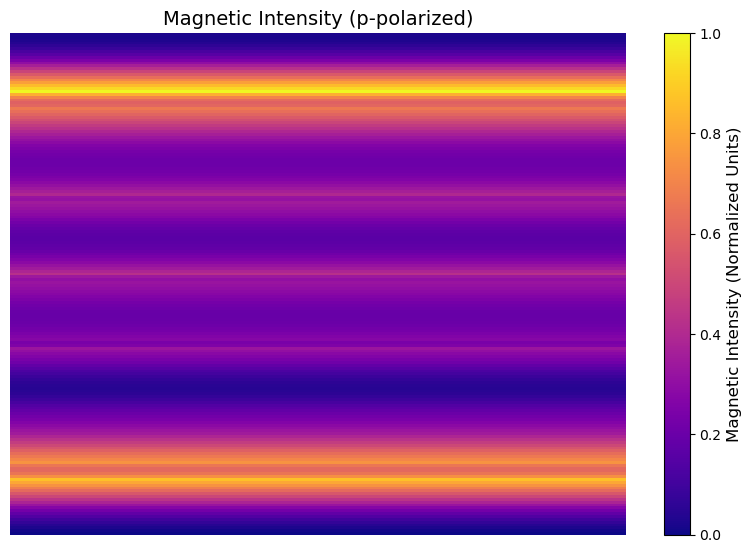

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize

# --- Configuration ---
output_np_file = '2d_data_array.npy'

# Desired Aspect Ratio (Width:Height)
# 500 / 352 ≈ 1.42
DESIRED_ASPECT_RATIO = 500 / 352

# Base width for the figure in inches
BASE_FIG_WIDTH = 8
# Calculate height to match the desired aspect ratio for the plot area
FIG_HEIGHT = BASE_FIG_WIDTH / DESIRED_ASPECT_RATIO


# --- 2. 讀取陣列並重現圖表 (Read Array and Recreate Plot) ---

def recreate_plot_from_file(file_path, aspect_ratio):
    """
    從 .npy 檔案中讀取 2D 陣列，並根據原始繪圖邏輯重現圖表，
    將圖形寬高比設定為 500:352。

    Args:
        file_path (str): .npy 檔案的路徑。
        aspect_ratio (float): 圖形寬度與高度的比例 (500/352)。
    """
    try:
        # 1. Load the array from the .npy file
        reloaded_array = np.load(file_path)
        print(f"\nSuccessfully loaded array from '{file_path}'.")
        print(f"Loaded array shape: {reloaded_array.shape}")
    except FileNotFoundError:
        print(f"Error: File not found at '{file_path}'.")
        return
    except Exception as e:
        print(f"Error loading file: {e}")
        return

    # Apply transpose (.T) as done in your original logic
    # This swaps the axes, often necessary for correct imshow orientation
    data_to_plot = reloaded_array.T

    # 2. Normalize Data
    # Normalize the data values (assuming max is 5.0 as implied by original logic,
    # but we'll use the array's max for robustness, then clip the colorbar)
    data_max = data_to_plot.max()
    normalized_data = data_to_plot / data_max
    
    # Define a custom normalization for the colorbar display (if needed, e.g. 0 to 5)
    # Since your original code implies data from 0-5, let's stick to using the 
    # array's max for normalization but define the color range from 0 to 5.
    
    # 3. Use Colormap to convert normalized data to RGB colors
    # Select the 'plasma' colormap
    plasma_cmap = cm.get_cmap('plasma')
    colored_data_rgba = plasma_cmap(normalized_data)
    # Convert RGBA to RGB (0-255 uint8) for plt.imshow if needed, 
    # but plt.imshow can handle the normalized array directly, which is cleaner.

    # --- 4. Plotting with Specified Aspect Ratio ---
    
    # Set the figure size using the pre-calculated dimensions
    plt.figure(figsize=(BASE_FIG_WIDTH, FIG_HEIGHT)) 
    
    # Plot the normalized data directly. 
    # The extent of the data itself (the number of pixels) defines the ratio *within* the plot area.
    # We use the 'plasma' colormap directly in imshow for simplicity and better colorbar handling.
    # We set vmin/vmax to 0/data_max to correctly map the colors, 
    # but for a cleaner look, we can use the original normalized_data and rely on the colorbar ticks.
    
    im = plt.imshow(data_to_plot, cmap='plasma', aspect='auto', interpolation='none')
    
    plt.title("Magnetic Intensity (p-polarized)", fontsize=14)
    plt.axis('off') # Keep the axis off

    # --- 5. Add Color Bar ---
    # We create the ScalarMappable to control the colorbar scale (e.g., from 0 to 5)
    
    # Find the maximum tick value based on the data maximum, rounded up (e.g. 5.0)
    # For simplicity and matching your original logic (ticks=np.linspace(0, 1, 6)), 
    # let's assume the max is 5.0 and the ticks should go from 0 to 5.
    
    # Define the range for the colorbar using Normalize
    norm_cbar = Normalize(vmin=0, vmax=1) # Assuming 5.0 is the upper limit for intensity
    
    # Use the image object to create the colorbar, but with the custom normalization
    cbar = plt.colorbar(cm.ScalarMappable(cmap='plasma', norm=norm_cbar),
                        ax=plt.gca(),
                        ticks=np.linspace(0, 1, 6), # Ticks from 0 to 5 with 6 points
                        label='Magnetic Intensity (Normalized Units)')
    
    cbar.set_label('Magnetic Intensity (Normalized Units)', fontsize=12)
    cbar.ax.tick_params(labelsize=10)

    plt.tight_layout()
    plt.show()

# 執行讀取並重現圖表的功能
recreate_plot_from_file(output_np_file, DESIRED_ASPECT_RATIO)

# Titanium Nitride Design
## 針對TE & TM 做最佳化，FOM定義為(TE+TM)/2
## encoding 27bits
## 4x4結構16bits, $d_1$上層厚度 3bits, $d_2$中層厚度(就是我們要設計的地方) 2bits, $d_3$下層厚度 3bits
### $d_1$對應關係為：000=>0, 001=>20, 010=>40, 011=>60, 100=>80, 101=>100, 110=>120, 111=>140。
### $d_2$對應關係為：00=>10, 01=>15, 10=>20, 11=>25。
### $d_3$對應關係為：000=>70, 001=>80, 010=>90, 011=>100, 100=>110, 101=>120, 110=>130, 111=>140。

### 新增width and height 3bits:000=> 100, 001=> 200, 010=> 300 .... 111=>800 
## 原始論文方法：initial：50筆，每次新增1筆，執行1500 iterations
## 我們的方法：初始訓練資料集為500筆資料，每次新增50筆資料，並執行迭代50次。
## papers:Total FOM_((TE+TM)/2) = 0.2375, TE=0.2405, TM=0.2345
## Ours:Total FOM_((TE+TM)/2) = 0.2244, TE=0.2302, TM=0.2185
================================================================================================

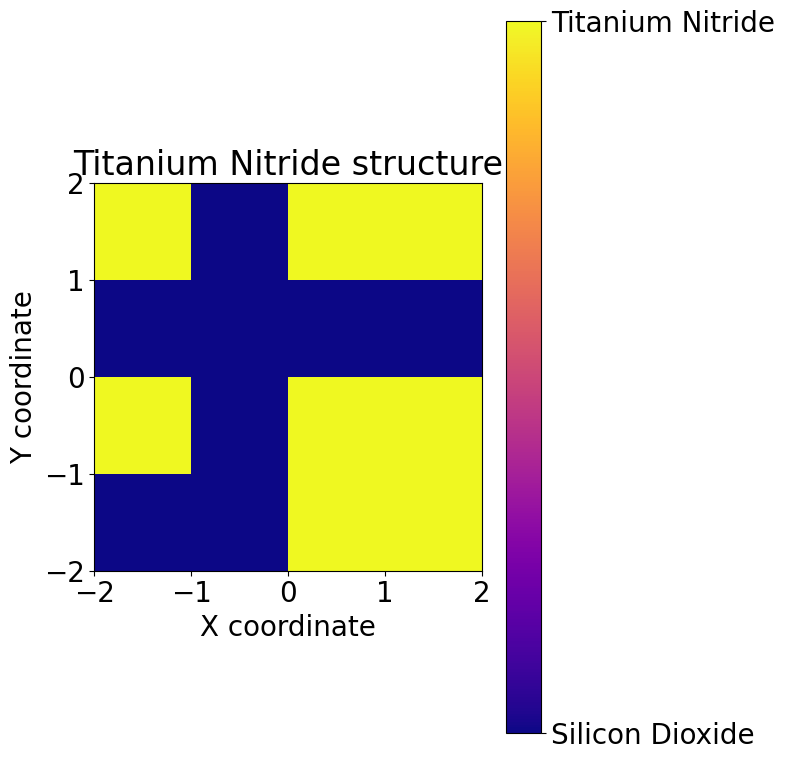

In [9]:


def plot_16_bit_squares(binary_vector):
    """
    將16個位元的二進位向量轉換為二維方塊圖。

    參數:
    binary_vector (str): 一個長度為16的字串，由'0'和'1'組成。

    回傳:
    None
    """
    # 驗證輸入字串的有效性
    if len(binary_vector) != 16 or not all(bit in '01' for bit in binary_vector):
        print("錯誤：輸入的向量必須是25個位元的二進位字串。")
        return

    # 將二進位字串轉換為 5x5 的 NumPy 陣列
    # 這裡的對應關係為：
    # 索引 i -> x 座標 = (i // 5) - 2, y 座標 = (i % 5) - 2
    matrix = np.zeros((4, 4))
    for i in range(16):
        # 根據您的座標對應關係，將 bit 1 放在 (-2, -2)
        # 這對應於矩陣的 matrix[0][0]
        row = i % 4
        col = i // 4
        matrix[row][col] = int(binary_vector[i])

    # 繪圖
    plt.rcParams['font.size'] = 20
    plt.figure(figsize=(8, 8))

    # 使用 imshow 繪製方塊圖
    # cmap='bwr' 是指藍色-白色-紅色漸層，這裡藍色代表0，紅色代表1
    # 為了使 y 軸從 -2 開始向上遞增，需要設定 origin='lower'
    # extent 定義了圖的邊界，讓座標軸正確顯示
    plt.imshow(matrix, cmap='plasma', origin='lower', extent=[-2, 2, -2, 2])

    # 設置標題和軸標籤
    plt.title('Titanium Nitride structure')
    plt.xlabel('X coordinate')
    plt.ylabel('Y coordinate')

    # 設置座標軸刻度，使其對應方塊的中心
    plt.xticks(np.arange(-2, 3, 1))
    plt.yticks(np.arange(-2, 3, 1))

    # 顯示顏色條，以便了解顏色的對應值
    cbar = plt.colorbar(ticks=[0, 1])
    cbar.ax.set_yticklabels(['Silicon Dioxide', 'Titanium Nitride'])

    # 顯示格線，讓方塊邊界更清晰
    #plt.grid(True, which='both', color='k', linestyle='-', linewidth=0.5)

    # 調整佈局以防止標籤重疊
    plt.tight_layout()
    plt.show()

# 範例用法：
# 輸入一個16個位元的二進位字串

sample_vector = "0101000011011101"

plot_16_bit_squares(sample_vector)

# Spectrum compared with ref paper


已成功從兩個檔案中讀取資料。


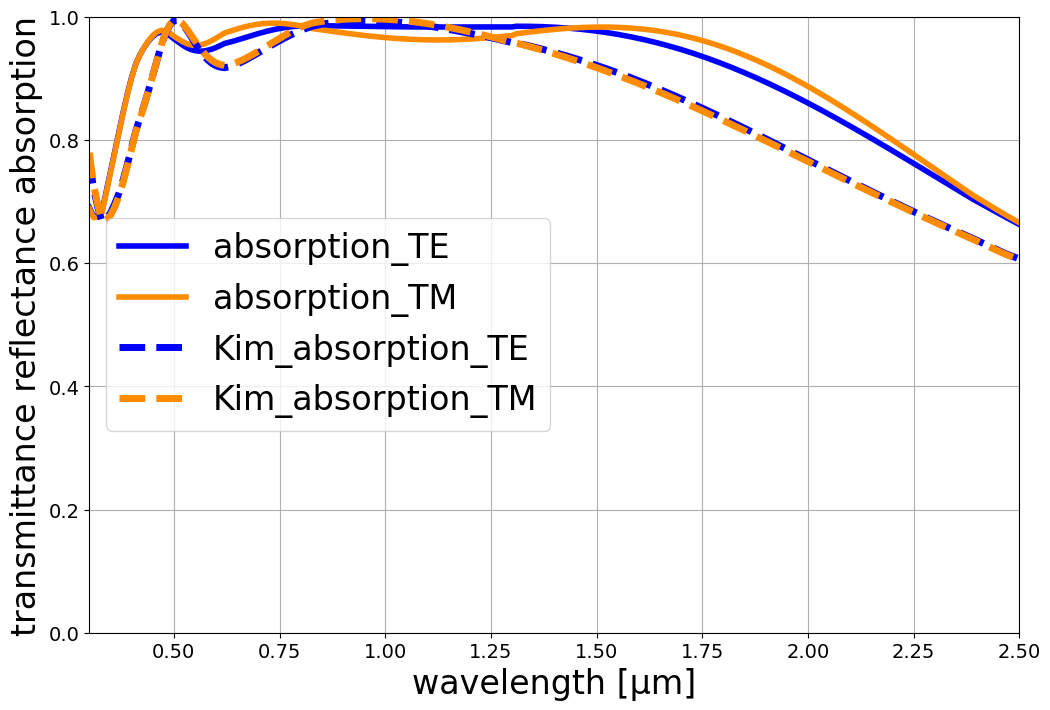

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def save_plot_data_to_files():
    """模擬生成圖表資料，並將資料分成兩個檔案儲存。"""
    
    # --- 模擬資料生成 ---
    # 這是你的原始程式碼中計算出來的數據，這裡用模擬的方式呈現。
    # 假設 wll 的數據點數量與 wavelength_array 不同。
    
    
    wavelength_array = np.linspace(0.4, 2, 80) # 

    # --- 檔案儲存 ---
    
    # 1. 儲存 SA 資料到 'SA_plot_data.txt'
    sa_data_to_save = np.vstack([
        wll,
        Tcl_back,
        Rcl_back,
        Acl_back
    ]).T
    
    sa_file_path = 'Tin_cooptimized_paper.txt'
    np.savetxt(sa_file_path, sa_data_to_save, fmt='%.6f', header='wll SA_transmittance SA_reflectance SA_absorbance')
    print(f"SA 資料已成功儲存到 '{sa_file_path}'。")
    
    # 2. 儲存 FDTD 資料到 'FDTD_plot_data.txt'
    fdtd_data_to_save = np.vstack([
        wavelength_array,
        efficiency_array,
        reflected_flux_array,
        emissive_array
    ]).T
    
    fdtd_file_path = 'Tin_4x4_cooptimized_27bits.txt'
    np.savetxt(fdtd_file_path, fdtd_data_to_save, fmt='%.6f', header='wavelength transmittance reflectance absorbance')
    print(f"FDTD 資料已成功儲存到 '{fdtd_file_path}'。")

# 執行資料儲存功能
#save_plot_data_to_files()

# --- 從檔案讀取資料並重現圖表 ---

def plot_from_files():
    """從兩個檔案中讀取資料，並重現圖表。"""
    try:
        # 讀取 SA 資料
        sa_data = np.loadtxt('Tin_cooptimized_paper.txt', skiprows=1)
        wll = sa_data[:, 0]
        Tcl_back_TE = sa_data[:, 1]
        Rcl_back_TE = sa_data[:, 2]
        Acl_back_TE = sa_data[:, 3]
        Tcl_back_TM = sa_data[:, 4]
        Rcl_back_TM = sa_data[:, 5]
        Acl_back_TM = sa_data[:, 6]
        # 讀取 FDTD 資料
        fdtd_data = np.loadtxt('Tin_4x4_cooptimized_27bits.txt', skiprows=1)
        wavelength_array = fdtd_data[:, 0]
        efficiency_array_TE = fdtd_data[:, 1]
        reflected_flux_array_TE = fdtd_data[:, 2]
        emissive_array_TE = fdtd_data[:, 3]
        efficiency_array_TM = fdtd_data[:, 4]
        reflected_flux_array_TM = fdtd_data[:, 5]
        emissive_array_TM = fdtd_data[:, 6]

        print("已成功從兩個檔案中讀取資料。")

    except FileNotFoundError as e:
        print(f"錯誤：找不到檔案，請確認檔案已存在。{e}")
        return
    except Exception as e:
        print(f"讀取檔案時發生錯誤：{e}")
        return

    # 重現圖表
    plt.figure(figsize=(12, 8))
    plt.grid(True)
    plt.rcParams['font.size'] = 24
    plt.xlabel('wavelength [μm]', fontsize=24)
    plt.ylabel('transmittance reflectance absorption', fontsize=24)
    plt.xticks(fontsize=14) # For x-axis tick labels
    plt.yticks(fontsize=14) # For y-axis tick labels
    # 繪製 our 線條
    #plt.plot(wavelength_array, efficiency_array_TE, color='blue', label='transmittance_TE')
    #plt.plot(wavelength_array, reflected_flux_array_TE, color='darkorange', label='reflectance_TE')
    plt.plot(wavelength_array, emissive_array_TE, color='blue', label='absorption_TE',linewidth=4.0)
    #plt.plot(wavelength_array, efficiency_array_TM, color='red', label='transmittance_TM')
    #plt.plot(wavelength_array, reflected_flux_array_TM, color='gold', label='reflectance_TM')
    plt.plot(wavelength_array, emissive_array_TM, color='darkorange', label='absorption_TM',linewidth=4.0)   
    # 繪製 paper 線條
    #plt.plot(wll, Tcl_back_TE, label='Kim_transmittance_TE', color='blue', linestyle='dashed')
    #plt.plot(wll, Rcl_back_TE, label='Kim_reflectance_TE', color='darkorange', linestyle='dashed')
    plt.plot(wll, Acl_back_TE, label='Kim_absorption_TE', color='blue', linestyle='dashed',linewidth=5.0)
    #plt.plot(wll, Tcl_back_TM, label='Kim_transmittance_TM', color='red', linestyle='dashed')
    #plt.plot(wll, Rcl_back_TM, label='Kim_reflectance_TM', color='darkorange', linestyle='dashed')
    plt.plot(wll, Acl_back_TM, label='Kim_absorption_TM', color='darkorange', linestyle='dashed',linewidth=5.0)    
    # 設置圖表樣式
    plt.xlim([0.3, 2.5])
    plt.ylim([0, 1])
    plt.legend(loc=6)
    plt.show()

# 執行讀取和繪圖功能
plot_from_files()

# Titanium Nitride Design(TE)
針對TE做最佳化（FOM:0.1925）
新增加三個量子位元將長度及寬度資訊加入最佳化：
100, 200, 300, 400, 500, 600, 700, 800 nm
初始訓練資料集為500筆資料，每次新增50筆資料，並執行迭代50次。
最終最佳化之結果：$d_1$上層厚度=80, $d_2$中層厚度(就是我們要設計的地方)=25, $d_3$下層厚度=60, 長與寬皆為200奈米。

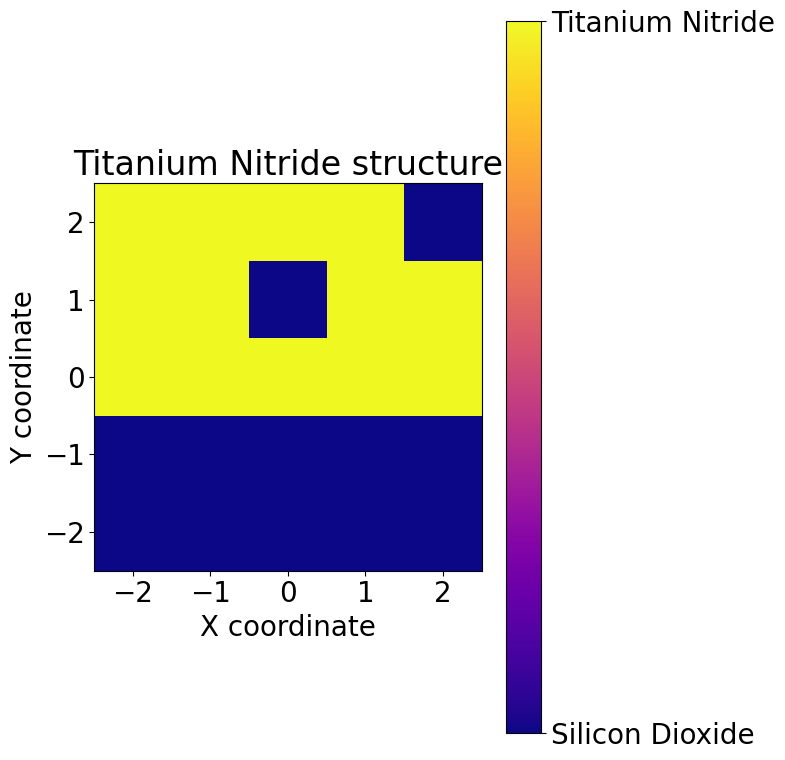

In [12]:


def plot_25_bit_squares(binary_vector):
    """
    將25個位元的二進位向量轉換為二維方塊圖。

    參數:
    binary_vector (str): 一個長度為25的字串，由'0'和'1'組成。

    回傳:
    None
    """
    # 驗證輸入字串的有效性
    if len(binary_vector) != 25 or not all(bit in '01' for bit in binary_vector):
        print("錯誤：輸入的向量必須是25個位元的二進位字串。")
        return

    # 將二進位字串轉換為 5x5 的 NumPy 陣列
    # 這裡的對應關係為：
    # 索引 i -> x 座標 = (i // 5) - 2, y 座標 = (i % 5) - 2
    matrix = np.zeros((5, 5))
    for i in range(25):
        # 根據您的座標對應關係，將 bit 1 放在 (-2, -2)
        # 這對應於矩陣的 matrix[0][0]
        row = i % 5
        col = i // 5
        matrix[row][col] = int(binary_vector[i])

    # 繪圖
    plt.rcParams['font.size'] = 20
    plt.figure(figsize=(8, 8))

    # 使用 imshow 繪製方塊圖
    # cmap='bwr' 是指藍色-白色-紅色漸層，這裡藍色代表0，紅色代表1
    # 為了使 y 軸從 -2 開始向上遞增，需要設定 origin='lower'
    # extent 定義了圖的邊界，讓座標軸正確顯示
    plt.imshow(matrix, cmap='plasma', origin='lower', extent=[-2.5, 2.5, -2.5, 2.5])

    # 設置標題和軸標籤
    plt.title('Titanium Nitride structure')
    plt.xlabel('X coordinate')
    plt.ylabel('Y coordinate')

    # 設置座標軸刻度，使其對應方塊的中心
    plt.xticks(np.arange(-2, 3, 1))
    plt.yticks(np.arange(-2, 3, 1))

    # 顯示顏色條，以便了解顏色的對應值
    cbar = plt.colorbar(ticks=[0, 1])
    cbar.ax.set_yticklabels(['Silicon Dioxide', 'Titanium Nitride'])

    # 顯示格線，讓方塊邊界更清晰
    #plt.grid(True, which='both', color='k', linestyle='-', linewidth=0.5)

    # 調整佈局以防止標籤重疊
    plt.tight_layout()
    plt.show()

# 範例用法：
# 輸入一個25個位元的二進位字串
#TM
#sample_vector = "0010111111111110000100000"
#TE
sample_vector = "0011100111001010011100110"
plot_25_bit_squares(sample_vector)

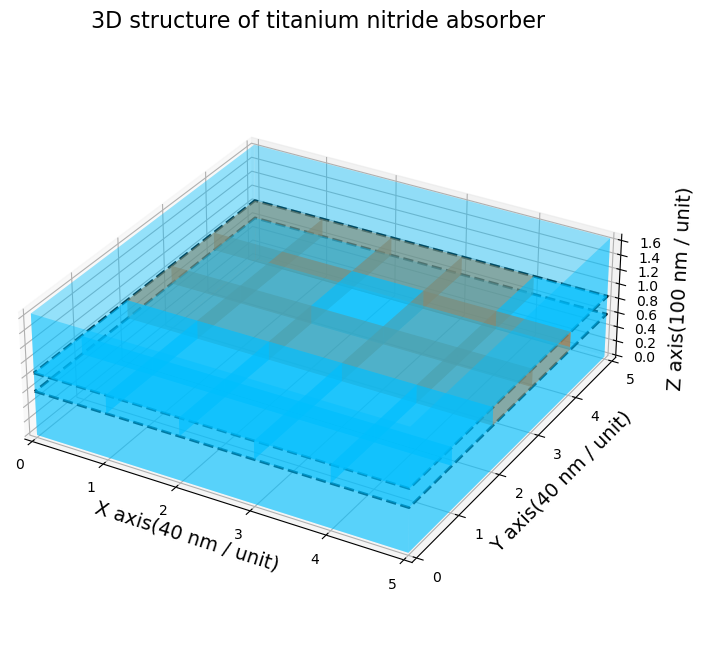

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def draw_3d_structure(grid, top_thickness, mid_thickness, bottom_thickness):
    """
    根據輸入的5x5二維矩陣和指定厚度，繪製三層3D立體圖。

    Args:
        grid (np.array): 5x5的二維矩陣，1代表TiN，0代表SiO2。
        top_thickness (float): 最上層的厚度。
        mid_thickness (float): 中間層的厚度。
        bottom_thickness (float): 最下層的厚度。
    """
    if grid.shape != (5, 5):
        print("錯誤：輸入的矩陣必須是5x5。")
        return

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # 設定材料顏色與透明度
    sio2_color = 'deepskyblue'   # SiO2 顏色
    tin_color = 'chocolate'      # TiN 顏色
    alpha_value = 0.4            # 透明度

    # 計算各層的 Z 軸位置
    bottom_z = 0
    mid_z_start = bottom_thickness
    mid_z_end = mid_z_start + mid_thickness
    top_z_start = mid_z_end
    top_z_end = top_z_start + top_thickness
    
    # 總高度
    total_height = top_thickness + mid_thickness + bottom_thickness

    # --- 繪製最下層：SiO2 ---
    bottom_vertices = [[0, 0, bottom_z], [5, 0, bottom_z], [5, 5, bottom_z], [0, 5, bottom_z]]
    bottom_plane = Poly3DCollection([bottom_vertices], facecolors=sio2_color, alpha=alpha_value)
    ax.add_collection3d(bottom_plane)
    
    
    
    # 繪製最下層的側面
    bottom_side_vertices = [[0, 0, bottom_z], [0, 0, mid_z_start], [5, 0, mid_z_start], [5, 0, bottom_z]]
    ax.add_collection3d(Poly3DCollection([bottom_side_vertices], facecolors=sio2_color, alpha=alpha_value))
    bottom_side_vertices = [[5, 0, bottom_z], [5, 0, mid_z_start], [5, 5, mid_z_start], [5, 5, bottom_z]]
    ax.add_collection3d(Poly3DCollection([bottom_side_vertices], facecolors=sio2_color, alpha=alpha_value))
    bottom_side_vertices = [[5, 5, bottom_z], [5, 5, mid_z_start], [0, 5, mid_z_start], [0, 5, bottom_z]]
    ax.add_collection3d(Poly3DCollection([bottom_side_vertices], facecolors=sio2_color, alpha=alpha_value))
    bottom_side_vertices = [[0, 5, bottom_z], [0, 5, mid_z_start], [0, 0, mid_z_start], [0, 0, bottom_z]]
    ax.add_collection3d(Poly3DCollection([bottom_side_vertices], facecolors=sio2_color, alpha=alpha_value))

    # --- 繪製中間層：5x5 結構 ---
    for i in range(5):
        for j in range(5):
            material_type = grid[i, j]
            color = tin_color if material_type == 1 else sio2_color
            
            # 繪製方塊
            x = [i, i+1, i+1, i, i, i+1, i+1, i]
            y = [j, j, j+1, j+1, j, j, j+1, j+1]
            z = [mid_z_start, mid_z_start, mid_z_start, mid_z_start, mid_z_end, mid_z_end, mid_z_end, mid_z_end]
            
            # 建立多邊形集合並加入到圖中
            verts = [[(x[k], y[k], z[k]) for k in [0, 1, 2, 3]],
                     [(x[k], y[k], z[k]) for k in [4, 5, 6, 7]], 
                     [(x[k], y[k], z[k]) for k in [0, 1, 5, 4]], 
                     [(x[k], y[k], z[k]) for k in [1, 2, 6, 5]], 
                     [(x[k], y[k], z[k]) for k in [2, 3, 7, 6]], 
                     [(x[k], y[k], z[k]) for k in [3, 0, 4, 7]]]
            ax.add_collection3d(Poly3DCollection(verts, facecolors=color, alpha=alpha_value))



    # --- 繪製最上層：SiO2 ---
    top_vertices = [[0, 0, top_z_start], [5, 0, top_z_start], [5, 5, top_z_start], [0, 5, top_z_start]]
    top_plane = Poly3DCollection([top_vertices], facecolors=sio2_color, alpha=alpha_value)
    ax.add_collection3d(top_plane)

    
    # 繪製最上層的側面
    top_side_vertices = [[0, 0, top_z_start], [0, 0, top_z_end], [5, 0, top_z_end], [5, 0, top_z_start]]
    ax.add_collection3d(Poly3DCollection([top_side_vertices], facecolors=sio2_color, alpha=alpha_value))
    top_side_vertices = [[5, 0, top_z_start], [5, 0, top_z_end], [5, 5, top_z_end], [5, 5, top_z_start]]
    ax.add_collection3d(Poly3DCollection([top_side_vertices], facecolors=sio2_color, alpha=alpha_value))
    top_side_vertices = [[5, 5, top_z_start], [5, 5, top_z_end], [0, 5, top_z_end], [0, 5, top_z_start]]
    ax.add_collection3d(Poly3DCollection([top_side_vertices], facecolors=sio2_color, alpha=alpha_value))
    top_side_vertices = [[0, 5, top_z_start], [0, 5, top_z_end], [0, 0, top_z_end], [0, 0, top_z_start]]
    ax.add_collection3d(Poly3DCollection([top_side_vertices], facecolors=sio2_color, alpha=alpha_value))
    # 增加邊框線條
    #ax.plot([0, 5, 5, 0, 0], [0, 0, 5, 5, 0], [bottom_z, bottom_z, bottom_z, bottom_z, bottom_z], color='dimgrey', linestyle='--', linewidth=2)
    # --- 在中間層與上下層之間繪製虛線 ---
    ax.plot([0, 5, 5, 0, 0], [0, 0, 5, 5, 0], [mid_z_start, mid_z_start, mid_z_start, mid_z_start, mid_z_start], 
            color='k', linestyle='--', linewidth=2)
    ax.plot([0, 5, 5, 0, 0], [0, 0, 5, 5, 0], [mid_z_end, mid_z_end, mid_z_end, mid_z_end, mid_z_end], 
            color='k', linestyle='--', linewidth=2)
    # 增加邊框線條
    #ax.plot([0, 5, 5, 0, 0], [0, 0, 5, 5, 0], [top_z_start, top_z_start, top_z_start, top_z_start, top_z_start], color='dimgrey', linestyle='--', linewidth=2)
    # 設定座標軸標籤與範圍
    ax.set_xlabel('X axis(40 nm / unit)', fontsize=14)
    ax.set_ylabel('Y axis(40 nm / unit)', fontsize=14)
    ax.set_zlabel('Z axis(100 nm / unit)', fontsize=14)
    ax.set_xlim([0, 5])
    ax.set_ylim([0, 5])
    ax.set_zlim([0, total_height])
    
    # 確保座標軸比例相等，讓圖形不變形
    ax.set_box_aspect([1, 1, total_height / 5.0])

    # 顯示圖形
    plt.title('3D structure of titanium nitride absorber', fontsize=16)
    plt.show()

# --- 在這裡設定您的 5x5 矩陣 ---
# 1 代表 TiN，0 代表 SiO2
user_grid = np.array([
    [0, 0, 1, 1, 1],
    [0, 0, 1, 1, 1],
    [0, 0, 1, 0, 1],
    [0, 0, 1, 1, 1],
    [0, 0, 1, 1, 0]
])

# --- 在這裡設定各層厚度 ---
# 您可以自由修改以下數值
top_thickness_val = 0.8
mid_thickness_val = 0.25
bottom_thickness_val = 0.6

# 呼叫函數，並傳入矩陣與厚度值
draw_3d_structure(user_grid, top_thickness_val, mid_thickness_val, bottom_thickness_val)

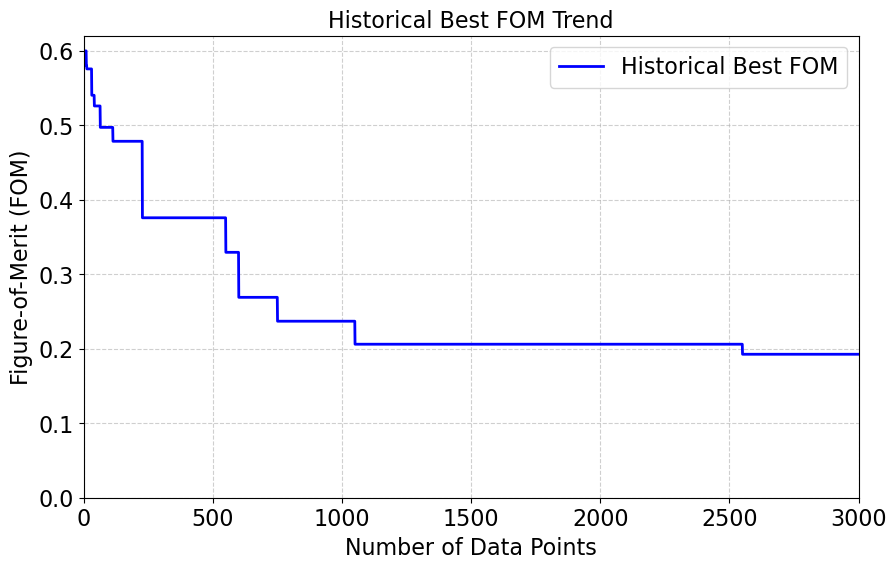

總共讀取了 3000 筆資料。
最終的歷史最佳 FOM 值為：0.192500


In [13]:


def plot_historical_best_fom(file_path):
    """
    從檔案中讀取 FOM 值，並繪製歷史最佳 FOM 趨勢圖。
    
    參數:
    - file_path (str): 包含 FOM 值的文字檔路徑。
    """
    try:
        # 讀取檔案並將每行轉換為浮點數
        with open(file_path, 'r') as file:
            fom_values = [float(line.strip()) for line in file if line.strip()]
    except FileNotFoundError:
        print(f"錯誤：找不到檔案 '{file_path}'。請檢查路徑是否正確。")
        return
    except ValueError:
        print(f"錯誤：檔案 '{file_path}' 中的資料格式不正確，請確保每行都是有效的數字。")
        return
    
    if not fom_values:
        print("錯誤：檔案中沒有任何有效的 FOM 值。")
        return
    
    # 初始化歷史最佳 FOM 列表
    historical_best_fom = []
    current_best = float('inf')  # 將初始最佳值設為無限大，確保第一筆資料能被取代
    
    # 遍歷所有 FOM 值，計算歷史最佳趨勢
    for fom in fom_values:
        if fom < current_best:
            current_best = fom
        historical_best_fom.append(current_best)
        
    # 建立橫軸資料：從 1 到資料總數
    data_points = range(1, len(fom_values) + 1)
    
    # 繪製圖表
    plt.figure(figsize=(10, 6))
    plt.plot(data_points, historical_best_fom, color='b', linestyle='-', linewidth=2, label='Historical Best FOM')
    plt.tick_params(labelsize=16)
    # 增加圖表標示
    plt.title('Historical Best FOM Trend', fontsize=16)
    plt.xlabel('Number of Data Points', fontsize=16)
    plt.ylabel('Figure-of-Merit (FOM)', fontsize=16)
    plt.legend(fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # 設定 X 軸和 Y 軸的起始點為 0
    plt.xlim(0,3000)
    plt.ylim(0)
    
    # 顯示圖表
    plt.show()
    
    print(f"總共讀取了 {len(fom_values)} 筆資料。")
    print(f"最終的歷史最佳 FOM 值為：{historical_best_fom[-1]:.6f}")

# 請將 'fom_data.txt' 替換為您的檔案路徑
plot_historical_best_fom('1d_array_ys_comma_0.1925_500+50_50(TE)_new.txt')

# Titanium Nitride Design(TM)
針對TM做最佳化（FOM:0.2056）
新增加三個量子位元將長度及寬度資訊加入最佳化： 
100, 200, 300, 400, 500, 600, 700, 800, 900 nm
初始訓練資料集為500筆資料，每次新增50筆資料，並執行迭代50次。
最終最佳化之結果：$d_1$上層厚度=80, $d_2$中層厚度(就是我們要設計的地方)=25, $d_3$下層厚度=70, 長與寬皆為200奈米。

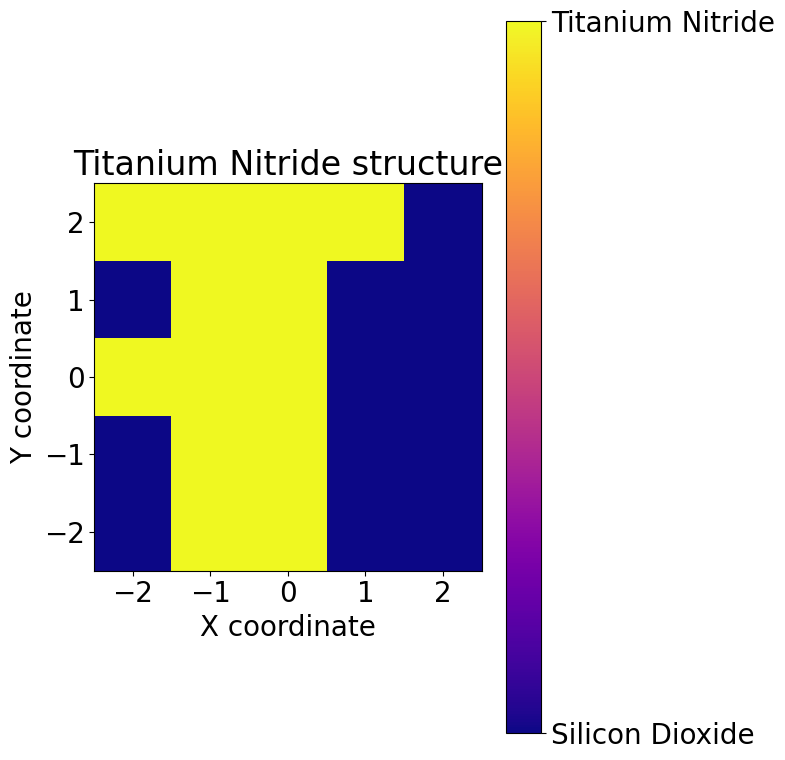

In [14]:


def plot_25_bit_squares(binary_vector):
    """
    將25個位元的二進位向量轉換為二維方塊圖。

    參數:
    binary_vector (str): 一個長度為25的字串，由'0'和'1'組成。

    回傳:
    None
    """
    # 驗證輸入字串的有效性
    if len(binary_vector) != 25 or not all(bit in '01' for bit in binary_vector):
        print("錯誤：輸入的向量必須是25個位元的二進位字串。")
        return

    # 將二進位字串轉換為 5x5 的 NumPy 陣列
    # 這裡的對應關係為：
    # 索引 i -> x 座標 = (i // 5) - 2, y 座標 = (i % 5) - 2
    matrix = np.zeros((5, 5))
    for i in range(25):
        # 根據您的座標對應關係，將 bit 1 放在 (-2, -2)
        # 這對應於矩陣的 matrix[0][0]
        row = i % 5
        col = i // 5
        matrix[row][col] = int(binary_vector[i])

    # 繪圖
    plt.rcParams['font.size'] = 20
    plt.figure(figsize=(8, 8))

    # 使用 imshow 繪製方塊圖
    # cmap='bwr' 是指藍色-白色-紅色漸層，這裡藍色代表0，紅色代表1
    # 為了使 y 軸從 -2 開始向上遞增，需要設定 origin='lower'
    # extent 定義了圖的邊界，讓座標軸正確顯示
    plt.imshow(matrix, cmap='plasma', origin='lower', extent=[-2.5, 2.5, -2.5, 2.5])

    # 設置標題和軸標籤
    plt.title('Titanium Nitride structure')
    plt.xlabel('X coordinate')
    plt.ylabel('Y coordinate')

    # 設置座標軸刻度，使其對應方塊的中心
    plt.xticks(np.arange(-2, 3, 1))
    plt.yticks(np.arange(-2, 3, 1))

    # 顯示顏色條，以便了解顏色的對應值
    cbar = plt.colorbar(ticks=[0, 1])
    cbar.ax.set_yticklabels(['Silicon Dioxide', 'Titanium Nitride'])

    # 顯示格線，讓方塊邊界更清晰
    #plt.grid(True, which='both', color='k', linestyle='-', linewidth=0.5)

    # 調整佈局以防止標籤重疊
    plt.tight_layout()
    plt.show()

# 範例用法：
# 輸入一個25個位元的二進位字串
#TM
sample_vector = "0010111111111110000100000"
#TE
#sample_vector = "0011100111001010011100110"
plot_25_bit_squares(sample_vector)

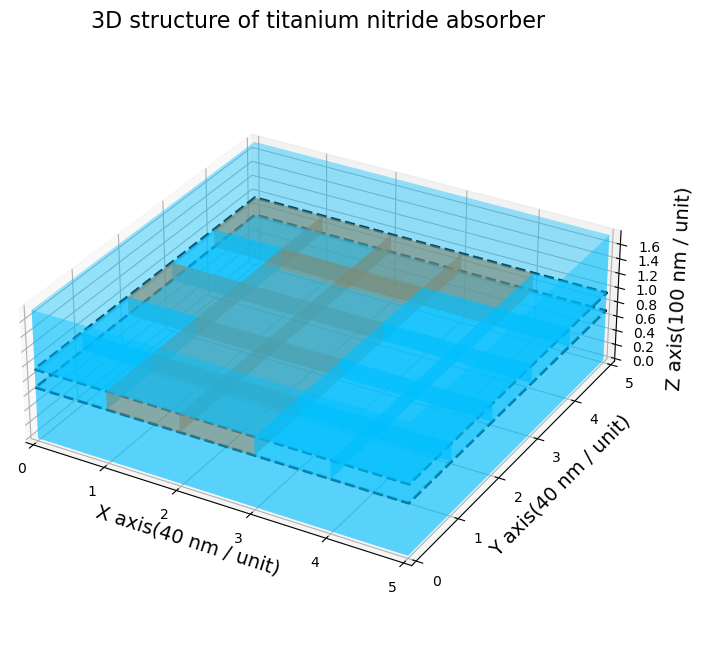

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def draw_3d_structure(grid, top_thickness, mid_thickness, bottom_thickness):
    """
    根據輸入的5x5二維矩陣和指定厚度，繪製三層3D立體圖。

    Args:
        grid (np.array): 5x5的二維矩陣，1代表TiN，0代表SiO2。
        top_thickness (float): 最上層的厚度。
        mid_thickness (float): 中間層的厚度。
        bottom_thickness (float): 最下層的厚度。
    """
    if grid.shape != (5, 5):
        print("錯誤：輸入的矩陣必須是5x5。")
        return

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # 設定材料顏色與透明度
    sio2_color = 'deepskyblue'   # SiO2 顏色
    tin_color = 'chocolate'      # TiN 顏色
    alpha_value = 0.4            # 透明度

    # 計算各層的 Z 軸位置
    bottom_z = 0
    mid_z_start = bottom_thickness
    mid_z_end = mid_z_start + mid_thickness
    top_z_start = mid_z_end
    top_z_end = top_z_start + top_thickness
    
    # 總高度
    total_height = top_thickness + mid_thickness + bottom_thickness

    # --- 繪製最下層：SiO2 ---
    bottom_vertices = [[0, 0, bottom_z], [5, 0, bottom_z], [5, 5, bottom_z], [0, 5, bottom_z]]
    bottom_plane = Poly3DCollection([bottom_vertices], facecolors=sio2_color, alpha=alpha_value)
    ax.add_collection3d(bottom_plane)
    
    
    
    # 繪製最下層的側面
    bottom_side_vertices = [[0, 0, bottom_z], [0, 0, mid_z_start], [5, 0, mid_z_start], [5, 0, bottom_z]]
    ax.add_collection3d(Poly3DCollection([bottom_side_vertices], facecolors=sio2_color, alpha=alpha_value))
    bottom_side_vertices = [[5, 0, bottom_z], [5, 0, mid_z_start], [5, 5, mid_z_start], [5, 5, bottom_z]]
    ax.add_collection3d(Poly3DCollection([bottom_side_vertices], facecolors=sio2_color, alpha=alpha_value))
    bottom_side_vertices = [[5, 5, bottom_z], [5, 5, mid_z_start], [0, 5, mid_z_start], [0, 5, bottom_z]]
    ax.add_collection3d(Poly3DCollection([bottom_side_vertices], facecolors=sio2_color, alpha=alpha_value))
    bottom_side_vertices = [[0, 5, bottom_z], [0, 5, mid_z_start], [0, 0, mid_z_start], [0, 0, bottom_z]]
    ax.add_collection3d(Poly3DCollection([bottom_side_vertices], facecolors=sio2_color, alpha=alpha_value))

    # --- 繪製中間層：5x5 結構 ---
    for i in range(5):
        for j in range(5):
            material_type = grid[i, j]
            color = tin_color if material_type == 1 else sio2_color
            
            # 繪製方塊
            x = [i, i+1, i+1, i, i, i+1, i+1, i]
            y = [j, j, j+1, j+1, j, j, j+1, j+1]
            z = [mid_z_start, mid_z_start, mid_z_start, mid_z_start, mid_z_end, mid_z_end, mid_z_end, mid_z_end]
            
            # 建立多邊形集合並加入到圖中
            verts = [[(x[k], y[k], z[k]) for k in [0, 1, 2, 3]],
                     [(x[k], y[k], z[k]) for k in [4, 5, 6, 7]], 
                     [(x[k], y[k], z[k]) for k in [0, 1, 5, 4]], 
                     [(x[k], y[k], z[k]) for k in [1, 2, 6, 5]], 
                     [(x[k], y[k], z[k]) for k in [2, 3, 7, 6]], 
                     [(x[k], y[k], z[k]) for k in [3, 0, 4, 7]]]
            ax.add_collection3d(Poly3DCollection(verts, facecolors=color, alpha=alpha_value))



    # --- 繪製最上層：SiO2 ---
    top_vertices = [[0, 0, top_z_start], [5, 0, top_z_start], [5, 5, top_z_start], [0, 5, top_z_start]]
    top_plane = Poly3DCollection([top_vertices], facecolors=sio2_color, alpha=alpha_value)
    ax.add_collection3d(top_plane)

    
    # 繪製最上層的側面
    top_side_vertices = [[0, 0, top_z_start], [0, 0, top_z_end], [5, 0, top_z_end], [5, 0, top_z_start]]
    ax.add_collection3d(Poly3DCollection([top_side_vertices], facecolors=sio2_color, alpha=alpha_value))
    top_side_vertices = [[5, 0, top_z_start], [5, 0, top_z_end], [5, 5, top_z_end], [5, 5, top_z_start]]
    ax.add_collection3d(Poly3DCollection([top_side_vertices], facecolors=sio2_color, alpha=alpha_value))
    top_side_vertices = [[5, 5, top_z_start], [5, 5, top_z_end], [0, 5, top_z_end], [0, 5, top_z_start]]
    ax.add_collection3d(Poly3DCollection([top_side_vertices], facecolors=sio2_color, alpha=alpha_value))
    top_side_vertices = [[0, 5, top_z_start], [0, 5, top_z_end], [0, 0, top_z_end], [0, 0, top_z_start]]
    ax.add_collection3d(Poly3DCollection([top_side_vertices], facecolors=sio2_color, alpha=alpha_value))
    # 增加邊框線條
    #ax.plot([0, 5, 5, 0, 0], [0, 0, 5, 5, 0], [bottom_z, bottom_z, bottom_z, bottom_z, bottom_z], color='dimgrey', linestyle='--', linewidth=2)
    # --- 在中間層與上下層之間繪製虛線 ---
    ax.plot([0, 5, 5, 0, 0], [0, 0, 5, 5, 0], [mid_z_start, mid_z_start, mid_z_start, mid_z_start, mid_z_start], 
            color='k', linestyle='--', linewidth=2)
    ax.plot([0, 5, 5, 0, 0], [0, 0, 5, 5, 0], [mid_z_end, mid_z_end, mid_z_end, mid_z_end, mid_z_end], 
            color='k', linestyle='--', linewidth=2)
    # 增加邊框線條
    #ax.plot([0, 5, 5, 0, 0], [0, 0, 5, 5, 0], [top_z_start, top_z_start, top_z_start, top_z_start, top_z_start], color='dimgrey', linestyle='--', linewidth=2)
    # 設定座標軸標籤與範圍
    ax.set_xlabel('X axis(40 nm / unit)', fontsize=14)
    ax.set_ylabel('Y axis(40 nm / unit)', fontsize=14)
    ax.set_zlabel('Z axis(100 nm / unit)', fontsize=14)
    ax.set_xlim([0, 5])
    ax.set_ylim([0, 5])
    ax.set_zlim([0, total_height])
    
    # 確保座標軸比例相等，讓圖形不變形
    ax.set_box_aspect([1, 1, total_height / 5.0])

    # 顯示圖形
    plt.title('3D structure of titanium nitride absorber', fontsize=16)
    plt.show()

# --- 在這裡設定您的 5x5 矩陣 ---
# 1 代表 TiN，0 代表 SiO2
user_grid = np.array([
    [0, 0, 1, 0, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0]
])

# --- 在這裡設定各層厚度 ---
# 您可以自由修改以下數值
top_thickness_val = 0.8
mid_thickness_val = 0.25
bottom_thickness_val = 0.7

# 呼叫函數，並傳入矩陣與厚度值
draw_3d_structure(user_grid, top_thickness_val, mid_thickness_val, bottom_thickness_val)

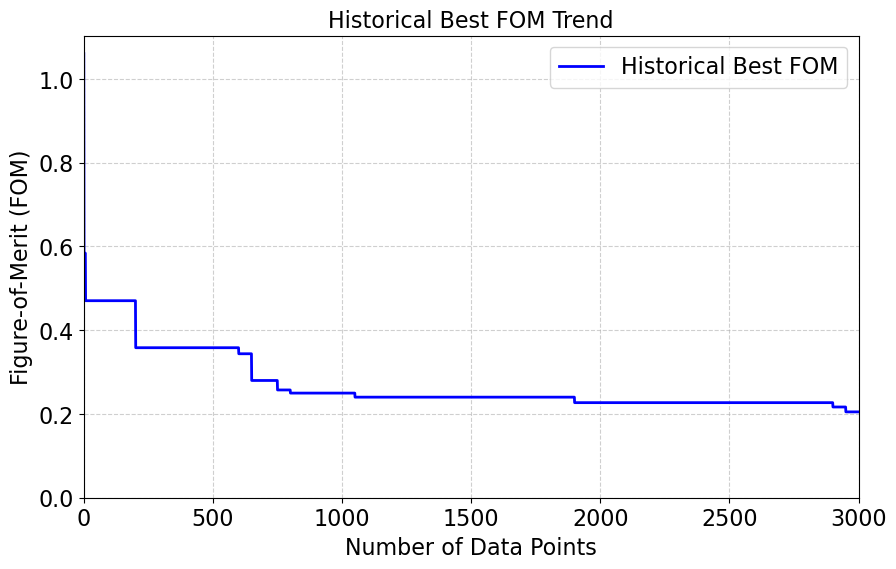

總共讀取了 3000 筆資料。
最終的歷史最佳 FOM 值為：0.205000


In [15]:


def plot_historical_best_fom(file_path):
    """
    從檔案中讀取 FOM 值，並繪製歷史最佳 FOM 趨勢圖。
    
    參數:
    - file_path (str): 包含 FOM 值的文字檔路徑。
    """
    try:
        # 讀取檔案並將每行轉換為浮點數
        with open(file_path, 'r') as file:
            fom_values = [float(line.strip()) for line in file if line.strip()]
    except FileNotFoundError:
        print(f"錯誤：找不到檔案 '{file_path}'。請檢查路徑是否正確。")
        return
    except ValueError:
        print(f"錯誤：檔案 '{file_path}' 中的資料格式不正確，請確保每行都是有效的數字。")
        return
    
    if not fom_values:
        print("錯誤：檔案中沒有任何有效的 FOM 值。")
        return
    
    # 初始化歷史最佳 FOM 列表
    historical_best_fom = []
    current_best = float('inf')  # 將初始最佳值設為無限大，確保第一筆資料能被取代
    
    # 遍歷所有 FOM 值，計算歷史最佳趨勢
    for fom in fom_values:
        if fom < current_best:
            current_best = fom
        historical_best_fom.append(current_best)
        
    # 建立橫軸資料：從 1 到資料總數
    data_points = range(1, len(fom_values) + 1)
    
    # 繪製圖表
    plt.figure(figsize=(10, 6))
    plt.plot(data_points, historical_best_fom, color='b', linestyle='-', linewidth=2, label='Historical Best FOM')
    plt.tick_params(labelsize=16)
    # 增加圖表標示
    plt.title('Historical Best FOM Trend', fontsize=16)
    plt.xlabel('Number of Data Points', fontsize=16)
    plt.ylabel('Figure-of-Merit (FOM)', fontsize=16)
    plt.legend(fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # 設定 X 軸和 Y 軸的起始點為 0
    plt.xlim(0,3000)
    plt.ylim(0)
    
    # 顯示圖表
    plt.show()
    
    print(f"總共讀取了 {len(fom_values)} 筆資料。")
    print(f"最終的歷史最佳 FOM 值為：{historical_best_fom[-1]:.6f}")

# 請將 'fom_data.txt' 替換為您的檔案路徑
plot_historical_best_fom('1d_array_ys_comma_0.205_500+50_50(TM)_new.txt')